In [3]:

import os, os.path
import numpy as np
import pandas as pd
import model_attributes as ma
from attribute_table import AttributeTable
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_energy as me
import model_electricity as ml
import model_socioeconomic as se
from model_socioeconomic import Socioeconomic
import setup_analysis as sa
import sisepuede as ssp
import support_classes as sc
import support_functions as sf
import importlib
import time
import warnings
import matplotlib.pyplot as plt
import sql_utilities as sq
from typing import *
import sqlalchemy
import sql_utilities as sqlutil
import time
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(sf)
importlib.reload(mafl)
importlib.reload(mc)
importlib.reload(mi)
importlib.reload(me)
importlib.reload(se)
importlib.reload(ml)

warnings.filterwarnings("ignore")

import logging
def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_energy_testing.log"))

MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


<Logger __main__ (DEBUG)>

'/Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/temporary_full_inputs.csv'

In [4]:
importlib.reload(ma)
importlib.reload(sa)

df_fake_data = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_complete.csv"))
v = list(sa.model_attributes.build_variable_dataframe_by_sector("Energy")["variable"].unique())
kk = [x for x in v if x not in df_fake_data.columns]
for k in kk:
    print(k)
    




In [5]:
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(mafl)
importlib.reload(me)
importlib.reload(mi)

#importlib.reload(mafl)
attr_strat = sa.model_attributes.dict_attributes.get("dim_strategy_id")

warnings.filterwarnings("ignore")

df_cs_integrated = pd.read_csv(sa.fp_csv_tmp_inputs)
df_cs_integrated = df_cs_integrated[
    df_cs_integrated["strategy_id"].isin([3026])
].reset_index(drop = True)

df_fake_data = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_complete.csv"))

it = [z for z in df_fake_data.columns if z not in df_cs_integrated.columns]
#it += [z for z in df_fake_data.columns if z.startswith("nemomod_entc_total_annual_max_capacity_investment")]
if True:
    for x in it:
        df_cs_integrated[x] = list(df_fake_data[x])

In [ ]:
importlib.reload(ml)
model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger, initialize_julia = True);

In [110]:
df_check = pd.read_csv("/Users/jsyme/Documents/Projects/git_jbus/sisepuede_launcher/model_input_18.csv")
df_check.rename(columns = {"primary_id": "strategy_id"}, inplace = True)
df_check.drop(["population_gnrl_total"], axis = 1, inplace = True)
df_check = df_check[
    df_check["strategy_id"].isin([14])
].reset_index(drop = True)


In [10]:
np.repeat(0, 5)

array([0, 0, 0, 0, 0])

In [36]:
#df1, df2 = model_socioeconomic.project(df_check)
df1 = sf.match_df_to_target_df(
    df_cs_integrated_0,
    df_tmp,
    [time_periods.field_time_period],
)

In [ ]:
import sqlalchemy
import sql_utilities as squ
#fp = "/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/sisepuede_run_2023-07-07T01;25;52.789483/sisepuede_run_2023-07-07T01;25;52.789483_output_database.sqlite"
fp = "/Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database.sqlite"
engine = sqlalchemy.create_engine(f"sqlite:///{fp}")
df = squ.sql_table_to_df(engine, "TotalAnnualMaxCapacityInvestment")


In [64]:
importlib.reload(se)
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(mc)
importlib.reload(mafl)
importlib.reload(me)
importlib.reload(mi)
importlib.reload(ml)

#importlib.reload(mafl)
attr_strat = sa.model_attributes.dict_attributes.get("dim_strategy_id")
time_periods = sc.TimePeriods(sa.model_attributes)

model_afolu = mafl.AFOLU(sa.model_attributes);
model_circecon = mc.CircularEconomy(sa.model_attributes);
model_ippu = mi.IPPU(sa.model_attributes);
#model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger, initialize_julia = True);
model_energy = me.NonElectricEnergy(sa.model_attributes);
model_socioeconomic = se.Socioeconomic(sa.model_attributes);


warnings.filterwarnings("ignore")
#strat_run = 0

region = "india"
df_cs_integrated_0 = pd.read_csv(sa.fp_csv_tmp_inputs)
df_cs_integrated_0[sa.model_attributes.dim_strategy_id] = 0
#df_cs_integrated_0 = pd.read_csv(os.path.join(sa.dir_tmp, f"temporary_full_inputs_{region}.csv"))
df_fake_data_0 = pd.read_csv(os.path.join(sa.dir_ref, "fake_data", "fake_data_complete.csv"))



###  TEMP

vec = np.array(df_cs_integrated_0["nemomod_entc_total_annual_max_capacity_investment_pp_hydropower_gw"]).copy()

val_max = vec[11]
for i in range(len(vec)):
    
    val = vec[i]
    ind = i%36
    
    if (ind >= 11) & (ind <= 20):
        val_new = 2*val_max*(21 - ind)/10
        vec[i] = val_new
        
    #if val > 0.0:
    #    val_new = val*1000
    #    vec[i] = val_new
    #vec[i] = -999.0

#df_cs_integrated_0["nemomod_entc_total_annual_max_capacity_investment_pp_hydropower_gw"] = vec
#df_cs_integrated_0[[x for x in df_cs_integrated_0.columns if x.startswith("nemomod_entc_total_annual_max_capacity_investment") and ("biomass" not in x)]] = -999.0



"""
# TEMPORARY BACK AND FORTH
df_tmp = pd.read_csv("/Users/jsyme/Desktop/turkey_inputs_tmp.csv")
df_cs_integrated_0 = sf.match_df_to_target_df(
    df_cs_integrated_0,
    df_tmp,
    [time_periods.field_time_period],
)

#df_cs_integrated_0["frac_gnrl_eating_red_meat"] = 1
vec = np.array(
    [float(sf.vec_bounds((x - 9)/25, (0, 1))) for x in range(36)]
    #[float(sf.vec_bounds(x - 9, (0, 1))) for x in range(36)]
)*0.5
"""
#region = "peru"
#df_cs_integrated_0["lndu_reallocation_factor"] = np.concatenate([vec for x in range(int(len(df_cs_integrated_0)/36))])
#vec = np.array(df_cs_integrated_0["scalar_lvst_carrying_capacity"])
#vec = 1 + (vec - 1)/2
#vec = sf.vec_bounds(vec, (1, np.inf))
#df_cs_integrated_0["scalar_lvst_carrying_capacity"] = vec
#df_cs_integrated_0["scalar_lvst_carrying_capacity"] = 1

#df_fake_data_0["frac_agrc_no_till_cereals"] = 1
#df_fake_data_0["frac_agrc_no_till_fibers"] = 1
#df_cs_integrated_0["frac_agrc_crop_residues_removed"] = 0.2
global df_tmp
def run_strat(
    strat_run: int,
    df_in: pd.DataFrame,
    df_fake_data: pd.DataFrame,
    project_nemomod: bool = False,
) -> pd.DataFrame:
    
    
    df_cs_integrated = (
        df_in[
            df_in["strategy_id"].isin([strat_run])
        ]
        .copy()
        .reset_index(drop = True)
    )
    
    it = [z for z in df_fake_data.columns if z not in df_cs_integrated.columns]
    for x in it:
        vec = np.array(df_fake_data[x])
        nr = len(df_cs_integrated) - len(vec)
        vec = (
            np.concatenate([vec, np.repeat(vec[len(vec) - 1], nr)])
            if nr > 0
            else vec
        )
        df_cs_integrated[x] = vec
    
    
    df_project_afolu = model_afolu.project(df_cs_integrated)
    df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_afolu], sa.model_attributes, "concatenate")
    
    # pass integrated df
    df_project_ce = model_circecon.project(df_cs_integrated)
    df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ce], sa.model_attributes, "concatenate")
    
    # pass integrated df
    df_project_ip = model_ippu.project(df_cs_integrated)
    df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ip], sa.model_attributes, "concatenate")
    
    # pass integrated df
    df_project_en = model_energy.project(df_cs_integrated);
    df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_en], sa.model_attributes, "concatenate")

    df_elec = None
    if project_nemomod:
        os.remove(sa.fp_sqlite_nemomod_db_tmp) if os.path.exists(sa.fp_sqlite_nemomod_db_tmp) else None
        engine = sqlalchemy.create_engine(f"sqlite:///{sa.fp_sqlite_nemomod_db_tmp}")
        t0 = time.time()
        df_elec = model_elec.project(df_cs_integrated, engine = engine, regions = region)
        t1 = time.time()
        
    return df_cs_integrated, df_elec


if True:
    df_elec_trajectories, df_elec = run_strat(
        0,#0, 
        df_cs_integrated_0, 
        df_fake_data_0, 
        project_nemomod = False,
    )
    df_msp = model_elec.format_nemomod_table_min_share_production(df_elec_trajectories).get("MinShareProduction")
    #df_msp[
    #    df_msp["y"].isin([1035])
    #    & df_msp["f"].isin(["fuel_electricity"])
    #]["val"].sum()





MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


In [35]:
strat_run = 0
df_in = df_cs_integrated_0.copy()
df_fake_data = df_fake_data_0.copy()


df_cs_integrated = (
    df_in[
        df_in["strategy_id"].isin([strat_run])
    ]
    .copy()
    .reset_index(drop = True)
)

it = [z for z in df_fake_data.columns if z not in df_cs_integrated.columns]
for x in it:
    vec = np.array(df_fake_data[x])
    nr = len(df_cs_integrated) - len(vec)
    vec = (
        np.concatenate([vec, np.repeat(vec[len(vec) - 1], nr)])
        if nr > 0
        else vec
    )
    df_cs_integrated[x] = vec
    
    
df_project_afolu = model_afolu.project(df_cs_integrated)
df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_afolu], sa.model_attributes, "concatenate")

# pass integrated df
#df_project_ce = model_circecon.project(df_cs_integrated)
#df_cs_integrated = sf.merge_output_df_list([df_cs_integrated, df_project_ce], sa.model_attributes, "concatenate")

In [ ]:
#?model_afolu.get_markov_matrices
sa.model_attributes.extract_model_variable(
        df_cs_integrated,
        model_afolu.modvar_lndu_prob_transition
    )

In [67]:
arr = model_afolu.get_markov_matrices(
    sa.model_attributes.extract_model_variable(
        df_elec_trajectories,
        model_afolu.modvar_lndu_prob_transition
    ),
    get_emission_factors = False,
)


In [71]:
sa.model_attributes.extract_model_variable(
    df_elec_trajectories,
    model_afolu.modvar_lvst_pop
)


,pop_lvst_buffalo,pop_lvst_cattle_dairy,pop_lvst_cattle_nondairy,pop_lvst_chickens,pop_lvst_goats,pop_lvst_horses,pop_lvst_mules,pop_lvst_pigs,pop_lvst_sheep
0,110313637.0,94083252.0,94083252.0,741104.0,138391039.0,566041.0,273999.0,9851101.0,66694431.0
1,109557741.0,93438570.0,93438570.0,765987.0,137442749.0,562163.0,272122.0,10099793.0,66237425.0
2,108826804.0,92815176.0,92815176.0,791612.0,136525772.0,558412.0,270307.0,10374144.0,65795508.0
3,108122779.0,92214734.0,92214733.0,817605.0,135642556.0,554800.0,268558.0,10607832.0,65369862.0
4,107696296.0,91850999.0,91850998.0,842050.0,135107523.0,552611.0,267499.0,10839492.0,65112015.0
5,107053623.0,91302882.0,91302881.0,866732.0,134301274.0,549314.0,265902.0,11071500.0,64723462.0
6,106415290.0,90758466.0,90758466.0,908231.0,133500470.0,546038.0,264317.0,11459059.0,64337533.0
7,105781268.0,90217728.0,90217727.0,946978.0,132705075.0,542785.0,262742.0,11795701.0,63954210.0
8,105151528.0,89680641.0,89680640.0,984898.0,131915051.0,539554.0,261178.0,12122709.0,63573476.0
9,104526039.0,89147180.0,89147180.0,1022048.0,131130361.0,536344.0,259624.0,12440941.0,63195312.0


In [72]:
df_elec_trajectories[
    [
        x for x in df_elec_trajectories.columns
        if ("lndu" in x)
        and ("area" in x)
    ]
]

,area_lndu_conversion_from_croplands,area_lndu_conversion_from_croplands_to_croplands,area_lndu_conversion_from_croplands_to_forests_mangroves,area_lndu_conversion_from_croplands_to_forests_primary,area_lndu_conversion_from_croplands_to_forests_secondary,area_lndu_conversion_from_croplands_to_grasslands,area_lndu_conversion_from_croplands_to_other,area_lndu_conversion_from_croplands_to_settlements,area_lndu_conversion_from_croplands_to_wetlands,area_lndu_conversion_from_forests_mangroves,...,area_lndu_croplands,area_lndu_forests_mangroves,area_lndu_forests_primary,area_lndu_forests_secondary,area_lndu_grasslands,area_lndu_improved_croplands,area_lndu_improved_grasslands,area_lndu_other,area_lndu_settlements,area_lndu_wetlands
0,89852.960467,2.131642e+08,2424.574730,0.0,11954.334897,10754.729713,18910.152808,7774.106859,38035.061459,8203.726697,...,2.132540e+08,373153.364225,4.345812e+07,9.791685e+06,5.057818e+07,660420.560748,2.528909e+06,3.545164e+06,2.198031e+06,5.527636e+06
1,115191.936147,2.132924e+08,2646.688144,0.0,10232.498053,9118.777364,36280.751966,11045.913112,45867.307508,8603.753452,...,2.134076e+08,374733.971785,4.345723e+07,9.824262e+06,5.023161e+07,660896.050502,2.511580e+06,3.626182e+06,2.210871e+06,5.593549e+06
2,59783.254411,2.134317e+08,3401.725459,0.0,8165.627337,7189.933397,13416.015186,8674.547442,18935.405590,6893.705058,...,2.134915e+08,375327.056031,4.345690e+07,9.853013e+06,4.989648e+07,661156.078839,2.494824e+06,3.769687e+06,2.231041e+06,5.652021e+06
3,88846.985552,2.135633e+08,2391.565739,0.0,8644.424201,13034.301596,20051.419966,11208.667090,33516.606960,10646.863465,...,2.136521e+08,378896.699123,4.345368e+07,9.866355e+06,4.957368e+07,661653.489102,2.478684e+06,3.919343e+06,2.250545e+06,5.631350e+06
4,88510.571263,2.136505e+08,2720.870436,0.0,9757.411023,10041.547285,22182.107438,9692.077818,34116.557263,8633.351097,...,2.137390e+08,377666.106148,4.344690e+07,9.868705e+06,4.937814e+07,661922.434851,2.468907e+06,4.010079e+06,2.267145e+06,5.638368e+06
5,88559.930137,2.137696e+08,2722.387759,0.0,9762.852348,10047.147062,22194.477529,9697.482710,34135.582729,8657.706852,...,2.138582e+08,378731.549131,4.344410e+07,9.887781e+06,4.908348e+07,662291.563026,2.454174e+06,4.123422e+06,2.284380e+06,5.665918e+06
6,88609.017720,2.138881e+08,2723.896742,0.0,9768.263767,10052.716061,22206.779631,9702.857895,34154.503625,8681.455313,...,2.139767e+08,379770.426019,4.344130e+07,9.906802e+06,4.879081e+07,662658.662370,2.439540e+06,4.235727e+06,2.301593e+06,5.693269e+06
7,88657.835598,2.140060e+08,2725.397434,0.0,9773.645453,10058.254462,22219.014140,9708.203546,34173.320563,8704.610594,...,2.140946e+08,380783.354184,4.343851e+07,9.925768e+06,4.850011e+07,663023.744733,2.425006e+06,4.347002e+06,2.318785e+06,5.720422e+06
8,88706.385344,2.141231e+08,2726.889884,0.0,9778.997580,10063.762443,22231.181452,9713.519837,34192.034149,8727.186473,...,2.142119e+08,381770.936452,4.343572e+07,9.944680e+06,4.821138e+07,663386.821887,2.410569e+06,4.457256e+06,2.335955e+06,5.747378e+06
9,88754.668522,2.142397e+08,2728.374139,0.0,9784.320320,10069.240182,22243.281957,9718.806938,34210.644986,8749.196407,...,2.143284e+08,382733.761438,4.343294e+07,9.963538e+06,4.792460e+07,663747.905522,2.396230e+06,4.566497e+06,2.353104e+06,5.774138e+06


In [90]:
df = model_elec.format_nemomod_table_total_capacity_tables(df_elec_trajectories, regions = region).get("TotalAnnualMaxCapacityInvestment")
df[df["t"].isin(["pp_hydropower"])]



,id,r,t,y,val
12,13,dominican_republic,pp_hydropower,1011,10.0
15,16,dominican_republic,pp_hydropower,1012,9.0
18,19,dominican_republic,pp_hydropower,1013,8.0
21,22,dominican_republic,pp_hydropower,1014,7.0
24,25,dominican_republic,pp_hydropower,1015,6.0
27,28,dominican_republic,pp_hydropower,1016,5.0
30,31,dominican_republic,pp_hydropower,1017,4.0
33,34,dominican_republic,pp_hydropower,1018,3.0
36,37,dominican_republic,pp_hydropower,1019,2.0
39,40,dominican_republic,pp_hydropower,1020,1.0


In [30]:
df_tfi = pd.read_csv(os.path.join(sa.dir_tmp, "temporary_full_inputs.csv"))

In [64]:
df_cs_integrated_0[[x for x in df_cs_integrated_0.columns if x.startswith("nemomod_entc_total_annual_max_capacity_investment")]].drop_duplicates()

,nemomod_entc_total_annual_max_capacity_investment_pp_biogas_gw,nemomod_entc_total_annual_max_capacity_investment_pp_biomass_gw,nemomod_entc_total_annual_max_capacity_investment_pp_coal_ccs_gw,nemomod_entc_total_annual_max_capacity_investment_pp_coal_gw,nemomod_entc_total_annual_max_capacity_investment_pp_gas_ccs_gw,nemomod_entc_total_annual_max_capacity_investment_pp_gas_gw,nemomod_entc_total_annual_max_capacity_investment_pp_geothermal_gw,nemomod_entc_total_annual_max_capacity_investment_pp_hydropower_gw,nemomod_entc_total_annual_max_capacity_investment_pp_nuclear_gw,nemomod_entc_total_annual_max_capacity_investment_pp_ocean_gw,nemomod_entc_total_annual_max_capacity_investment_pp_oil_gw,nemomod_entc_total_annual_max_capacity_investment_pp_solar_gw,nemomod_entc_total_annual_max_capacity_investment_pp_waste_incineration_gw,nemomod_entc_total_annual_max_capacity_investment_pp_wind_gw
0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
11,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,10.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
12,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,9.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
13,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,8.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
14,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,7.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
15,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,6.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
16,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,5.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
17,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,4.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
18,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,3.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0
19,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,2.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [85]:
df_cs_integrated_0[df_cs_integrated_0["time_period"].isin([6])][["strategy_id"] + 
    [x for x in df_cs_integrated_0.columns if ("min_share_production" in x) and ("biomass" in x)]
]

,strategy_id,nemomod_entc_frac_min_share_production_pp_biomass
6,0,0.0
42,1001,0.0
78,1002,0.0
114,1003,0.0
150,1004,0.0
...,...,...
4470,5006,0.0
4506,5007,0.0
4542,5008,0.0
4578,5009,0.0


In [48]:
#df_cs_integrated_0[[x for x in df_cs_integrated_0.columns if x.startswith("nemomod_entc_total_annual_max_capacity_investment")]].drop_duplicates().iloc[0]
df_msp[
    df_msp["f"].isin(["fuel_electricity"])
    & df_msp["y"].isin([1006])
    #& df_msp["t"].isin(["pp_biomass"])
]

,id,r,t,f,y,val


In [9]:
df_cs_integrated_0[[x for x in df_cs_integrated_0.columns if x.startswith("nemomod_entc_total_annual_max_capacity_investment")]].drop_duplicates().iloc[0]

nemomod_entc_total_annual_max_capacity_investment_pp_biogas_gw               -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_biomass_gw                 0.0
nemomod_entc_total_annual_max_capacity_investment_pp_coal_ccs_gw             -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_coal_gw                 -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_gas_ccs_gw              -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_gas_gw                  -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_geothermal_gw           -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_hydropower_gw           -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_nuclear_gw              -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_ocean_gw                -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_oil_gw                  -999.0
nemomod_entc_total_annual_max_capacity_investment_pp_solar_gw               

In [30]:
df = model_elec.format_nemomod_table_min_share_production(df_elec_trajectories, regions = region).get("MinShareProduction")
df[
    df["f"].isin(["fuel_electricity"])
    & (df["val"] > 0)
]

,id,r,t,f,y,val
42,43,dominican_republic,pp_biomass,fuel_electricity,1006,0.004206
43,44,dominican_republic,pp_biomass,fuel_electricity,1007,0.008412
44,45,dominican_republic,pp_biomass,fuel_electricity,1008,0.012078
45,46,dominican_republic,pp_biomass,fuel_electricity,1009,0.015457
46,47,dominican_republic,pp_biomass,fuel_electricity,1010,0.018590
...,...,...,...,...,...,...
427,428,dominican_republic,pp_wind,fuel_electricity,1031,0.250591
428,429,dominican_republic,pp_wind,fuel_electricity,1032,0.252825
429,430,dominican_republic,pp_wind,fuel_electricity,1033,0.254769
430,431,dominican_republic,pp_wind,fuel_electricity,1034,0.256469


In [12]:
df_elec_trajectories[
    [
        x for x in df_elec_trajectories.columns
        if ("energy_consumption_electricity" in x) & ("total" in x)

    ]
]



,energy_consumption_electricity_ccsq_total,energy_consumption_electricity_inen_total,energy_consumption_electricity_scoe_total,energy_consumption_electricity_trns_total
0,0.0,30.174997,98.980080,0.567110
1,0.0,29.010737,104.310705,0.586715
2,0.0,32.679430,109.699940,0.603482
3,0.0,37.165462,115.143947,0.623606
4,0.0,40.179469,120.637093,0.643097
5,0.0,38.136455,123.553456,0.666939
6,0.0,39.522479,129.206867,0.679934
7,0.0,40.610478,134.871016,0.704458
8,0.0,41.686495,140.502987,0.727650
9,0.0,42.750124,146.099819,0.750937


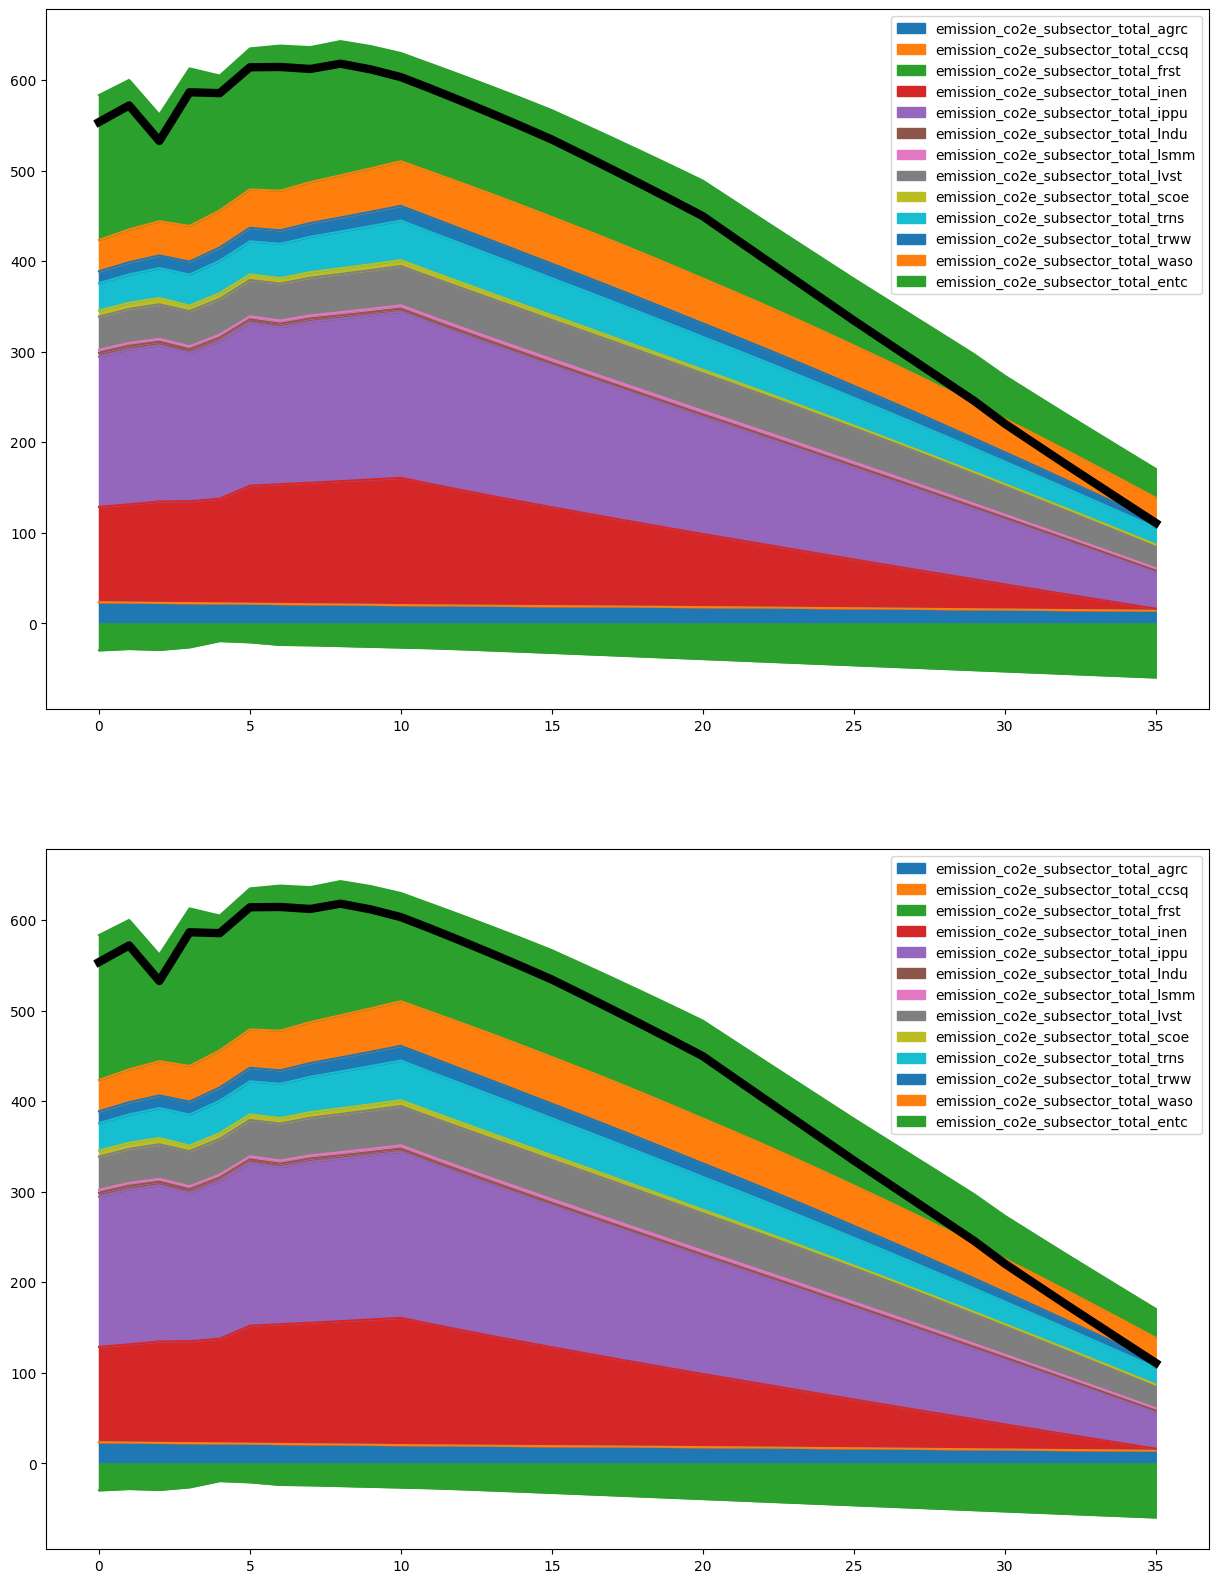

In [41]:
df_out = pd.merge(
    df_elec_trajectories,
    df_elec,
)


df_1014 = df_out.copy()
fig, ax = plt.subplots(2, 1, figsize = (15, 20))
#ax[0].set_ylim(-1000, 3500)
#ax[1].set_ylim(-1000, 3500)
#df_1014 = df_out.copy()
plot_cattle_domestic = False
flds = [
    x for x in df_out.columns 
    if x.startswith("emission_co2e")
    #and ("lndu" in x) 
    and ("subsector_total" in x)
]




if 0:
    flds = [
        x for x in df_out.columns 
        if x.startswith("area_lndu")
        #and ("lndu" in x) 
        and ("conv" not in x)
        and ("improved" not in x)
        #and ("forest" in x)
    ]
    
if 0:
    plot_cattle_domestic = True
    flds = [
        x for x in df_out.columns 
        if (
            x.startswith("exportsadj_lvst")
            or x.startswith("pop_lvst")
        )
        and ("cattle" in x)
    ]
    
if 0:
    flds = [
        x for x in df_out.columns 
        if x.startswith("area_lndu")
        and ("conv" not in x)
        and ("improved" not in x)
        #and ("lndu" in x) 
        #and ("conv" not in x)
    ]



if len(df_out) > 0:
    
    flds_out = flds.copy()
    
    for k in flds_out:
        vec = np.array(df_out[k])
        bnds = (0, np.inf) if (vec[-1] >= 0) else (-np.inf, 0)
        if (max(vec) > 0) and (min(vec) < 0):
            k0 = f"{k}_positive"
            k1 = f"{k}_negative"
            df_out[k0] = sf.vec_bounds(np.array(df_out[k]), (0, np.inf))
            df_out[k1] = sf.vec_bounds(np.array(df_out[k]), (-np.inf, 0))
            df_out.drop([k], axis = 1, inplace = True)
            flds = flds + [k0, k1]
            flds = [x for x in flds if x != k]
        else:
            df_out[k] = sf.vec_bounds(np.array(df_out[k]), bnds)
    
#
if plot_cattle_domestic:
    for k in ["cattle_dairy", "cattle_nondairy"]:
        df_out[f"domestic_{k}"] = np.array(df_out[f"pop_lvst_{k}"]) - np.array(df_out[f"exportsadj_lvst_{k}"])
        df_1014[f"domestic_{k}"] = np.array(df_1014[f"pop_lvst_{k}"]) - np.array(df_1014[f"exportsadj_lvst_{k}"])

        flds_drop = [f"pop_lvst_initial_{k}", f"pop_lvst_{k}"]
        flds += [f"domestic_{k}"]
        flds = [x for x in flds if x not in flds_drop]

flds = [x for x in flds if (x in df_out.columns) and (x in df_1014.columns)]
df_1014[flds].plot.area(ax = ax[0])
df_out[flds].plot.area(ax = ax[1])

if True:
    vec_1014_total = df_1014[flds].sum(axis = 1)
    vec_total = df_out[flds].sum(axis = 1)

    ax[0].plot(vec_1014_total, linewidth = 6, color = "black")
    ax[1].plot(vec_total, linewidth = 6, color = "black")

In [27]:
df_out[[x for x in df_out.columns if ("ccsq" in x) & ("emission_co2e" in x)]]

,emission_co2e_ch4_ccsq_direct_air_capture,emission_co2e_co2_ccsq_direct_air_capture,emission_co2e_n2o_ccsq_direct_air_capture,emission_co2e_subsector_total_ccsq,emission_co2e_ch4_entc_generation_for_ccsq,emission_co2e_co2_entc_generation_for_ccsq,emission_co2e_n2o_entc_generation_for_ccsq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
sa.model_attributes.extract_model_variable(
    df_cs_integrated_0,
    model_afolu.modvar_agrc_yf
).iloc[0]

yf_agrc_bevs_and_spices_tonne_ha                     3.797200
yf_agrc_cereals_tonne_ha                             3.329370
yf_agrc_fibers_tonne_ha                              2.861750
yf_agrc_fruits_tonne_ha                             15.658532
yf_agrc_herbs_and_other_perennial_crops_tonne_ha     0.649500
yf_agrc_nuts_tonne_ha                                3.051971
yf_agrc_other_annual_tonne_ha                        1.692029
yf_agrc_other_woody_perennial_tonne_ha               0.000000
yf_agrc_pulses_tonne_ha                              3.953911
yf_agrc_rice_tonne_ha                                7.940900
yf_agrc_sugar_cane_tonne_ha                          0.000000
yf_agrc_tubers_tonne_ha                             35.194633
yf_agrc_vegetables_and_vines_tonne_ha               21.939292
Name: 0, dtype: float64

In [88]:
vec = np.array(df_cs_integrated_0["climate_change_factor_gnrl_hydropower_availability"])
vec = 1 + (vec - 1)/2
vec = sf.vec_bounds(vec, (1, np.inf))


#df_cs_integrated_0["frac_gnrl_eating_red_meat"] = 1
vec = 1 - np.array(
    [float(sf.vec_bounds((x - 9)/25, (0, 1))) for x in range(36)]
    #[float(sf.vec_bounds(x - 9, (0, 1))) for x in range(36)]
)*0.5
region = "brazil"
df_cs_integrated_0["climate_change_factor_gnrl_hydropower_availability"] = np.concatenate([vec for x in range(int(len(df_cs_integrated_0)/36))])
df_cs_integrated_0["climate_change_factor_gnrl_hydropower_availability"].iloc[0:37]



0     1.00
1     1.00
2     1.00
3     1.00
4     1.00
5     1.00
6     1.00
7     1.00
8     1.00
9     1.00
10    0.98
11    0.96
12    0.94
13    0.92
14    0.90
15    0.88
16    0.86
17    0.84
18    0.82
19    0.80
20    0.78
21    0.76
22    0.74
23    0.72
24    0.70
25    0.68
26    0.66
27    0.64
28    0.62
29    0.60
30    0.58
31    0.56
32    0.54
33    0.52
34    0.50
35    0.50
36    1.00
Name: climate_change_factor_gnrl_hydropower_availability, dtype: float64

In [72]:
importlib.reload(ma)
importlib.reload(sa)
importlib.reload(ml)
model_elec = ml.ElectricEnergy(sa.model_attributes, sa.dir_jl, sa.dir_ref_nemo, logger = logger, initialize_julia = True);

2023-07-17 00:47:59,424 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/sisepuede/ref/nemo_mod/CapacityFactor.csv
2023-07-17 00:47:59,433 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/sisepuede/ref/nemo_mod/SpecifiedDemandProfile.csv
2023-07-17 00:47:59,565 - INFO - Calling Julia API...
2023-07-17 00:47:59,572 - DEBUG - 	Successfully activated Julia with compiled_modules = False
2023-07-17 00:47:59,573 - DEBUG - 	Successfully imported julia.Base
2023-07-17 00:47:59,573 - DEBUG - 	Successfully imported julia.Main
2023-07-17 00:47:59,574 - DEBUG - 	Successfully imported julia.Pkg
2023-07-17 00:47:59,642 - DEBUG - 	Available Packages:
		'CSV'
		 'HiGHS'
		 'SQLite'
		 'Clp'
		 'JuMP'
		 'NemoMod'
		 'GAMS'
		 'Cbc'
		 'DataFrames'
		 'Gurobi'
		 'MathOptInterface'
  Activating2023-07-17 00:47:59,683 - INFO - Successfully activated Julia environment at '/Users/jsyme/Documents/Projects/git_

In [89]:
tmp = model_elec.format_nemomod_table_capacity_factor(
    df_cs_integrated_0.iloc[0:36],
    model_elec.dict_nemomod_reference_tables.get(model_elec.model_attributes.table_nemomod_capacity_factor)
)
tmp

{'CapacityFactor':           id           r          t            l     y   val
 0          1  costa_rica  pp_biogas  dec_feb_wd0  1000  0.50
 1          2  costa_rica  pp_biogas  dec_feb_wd0  1001  0.50
 2          3  costa_rica  pp_biogas  dec_feb_wd0  1002  0.50
 3          4  costa_rica  pp_biogas  dec_feb_wd0  1003  0.50
 4          5  costa_rica  pp_biogas  dec_feb_wd0  1004  0.50
 ...      ...         ...        ...          ...   ...   ...
 13819  13820  costa_rica    pp_wind  sep_nov_we6  1031  0.26
 13820  13821  costa_rica    pp_wind  sep_nov_we6  1032  0.26
 13821  13822  costa_rica    pp_wind  sep_nov_we6  1033  0.26
 13822  13823  costa_rica    pp_wind  sep_nov_we6  1034  0.26
 13823  13824  costa_rica    pp_wind  sep_nov_we6  1035  0.26
 
 [13824 rows x 6 columns]}

In [90]:
df = tmp.get("CapacityFactor")
df[
    df["y"].isin([1000])
    & df["t"].isin(["pp_hydropower"])
]

,id,r,t,l,y,val
5760,5761,costa_rica,pp_hydropower,dec_feb_wd0,1000,0.608014
5796,5797,costa_rica,pp_hydropower,dec_feb_wd12,1000,0.608014
5832,5833,costa_rica,pp_hydropower,dec_feb_wd18,1000,0.608014
5868,5869,costa_rica,pp_hydropower,dec_feb_wd6,1000,0.608014
5904,5905,costa_rica,pp_hydropower,dec_feb_we0,1000,0.608014
5940,5941,costa_rica,pp_hydropower,dec_feb_we12,1000,0.608014
5976,5977,costa_rica,pp_hydropower,dec_feb_we18,1000,0.608014
6012,6013,costa_rica,pp_hydropower,dec_feb_we6,1000,0.608014
6048,6049,costa_rica,pp_hydropower,jun_aug_wd0,1000,0.730002
6084,6085,costa_rica,pp_hydropower,jun_aug_wd12,1000,0.730002


In [91]:
df = tmp.get("CapacityFactor")
df[
    df["y"].isin([1035])
    & df["t"].isin(["pp_hydropower"])
]

,id,r,t,l,y,val
5795,5796,costa_rica,pp_hydropower,dec_feb_wd0,1035,0.304007
5831,5832,costa_rica,pp_hydropower,dec_feb_wd12,1035,0.304007
5867,5868,costa_rica,pp_hydropower,dec_feb_wd18,1035,0.304007
5903,5904,costa_rica,pp_hydropower,dec_feb_wd6,1035,0.304007
5939,5940,costa_rica,pp_hydropower,dec_feb_we0,1035,0.304007
5975,5976,costa_rica,pp_hydropower,dec_feb_we12,1035,0.304007
6011,6012,costa_rica,pp_hydropower,dec_feb_we18,1035,0.304007
6047,6048,costa_rica,pp_hydropower,dec_feb_we6,1035,0.304007
6083,6084,costa_rica,pp_hydropower,jun_aug_wd0,1035,0.365001
6119,6120,costa_rica,pp_hydropower,jun_aug_wd12,1035,0.365001


In [71]:
model_elec.get_gnrl_ccf_hydropower_factor_df(df_cs_integrated_0.iloc[0:36])

(    climate_change_factor_gnrl_hydropower_availability              t     y
 0                                                 1.0   pp_hydropower  1000
 1                                                 1.0   pp_hydropower  1001
 2                                                 1.0   pp_hydropower  1002
 3                                                 1.0   pp_hydropower  1003
 4                                                 1.0   pp_hydropower  1004
 5                                                 1.0   pp_hydropower  1005
 6                                                 1.0   pp_hydropower  1006
 7                                                 1.0   pp_hydropower  1007
 8                                                 1.0   pp_hydropower  1008
 9                                                 1.0   pp_hydropower  1009
 10                                                1.0   pp_hydropower  1010
 11                                                1.0   pp_hydropower  1011

In [59]:
# get hydropower climate change factor
df_gnrl_ccf_hydropower = model_elec.model_attributes.extract_model_variable(
    df_cs_integrated_0,
    model_elec.model_socioeconomic.modvar_gnrl_climate_change_hydropower_availability,
    include_time_period = True,
    return_type = "data_frame",
)

"""
df_gnrl_ccf_hydropower = (
    model_elec.add_index_field_year(df_gnrl_ccf_hydropower, outer_prod = True)
    .drop([model_elec.model_attributes.dim_time_period], axis = 1)
)
"""

model_elec.model_attributes.exchange_year_time_period(
    df_gnrl_ccf_hydropower,
    model_elec.field_nemomod_year,
    df_gnrl_ccf_hydropower[model_elec.model_attributes.dim_time_period],
    attribute_time_period = model_elec.model_attributes.dict_attributes.get("dim_time_period"),
    direction = model_elec.direction_exchange_year_time_period
)

#df_gnrl_ccf_hydropower

,time_period,climate_change_factor_gnrl_hydropower_availability,y
0,0,1.0,0
1,1,1.0,1
2,2,1.0,2
3,3,1.0,3
4,4,1.0,4
...,...,...,...
4531,31,1.0,31
4532,32,1.0,32
4533,33,1.0,33
4534,34,1.0,34


In [66]:
df = tmp.get("CapacityFactor")
df#[df["id"] == 3]

,id,r,t,l,y,val
0,1,costa_rica,pp_biogas,dec_feb_wd0,1000,0.50
1,2,costa_rica,pp_biogas,dec_feb_wd0,1001,0.50
2,3,costa_rica,pp_biogas,dec_feb_wd0,1002,0.50
3,4,costa_rica,pp_biogas,dec_feb_wd0,1003,0.50
4,5,costa_rica,pp_biogas,dec_feb_wd0,1004,0.50
...,...,...,...,...,...,...
157819,13820,costa_rica,pp_wind,sep_nov_we6,1031,0.26
157820,13821,costa_rica,pp_wind,sep_nov_we6,1032,0.26
157821,13822,costa_rica,pp_wind,sep_nov_we6,1033,0.26
157822,13823,costa_rica,pp_wind,sep_nov_we6,1034,0.26


In [4]:
df_out, df_elec = run_strat(1014, df_cs_integrated_0, df_fake_data_0, project_nemomod = False);

In [7]:
df_cs_integrated_0[[x for x in df_cs_integrated_0.columns if "climate_change_factor" in x]]

,climate_change_factor_gnrl_hydropower_availability
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4531,1.0
4532,1.0
4533,1.0
4534,1.0


In [147]:
sa.model_attributes.extract_model_variable(
    df_check,
    model_afolu.modvar_lndu_frac_mineral_soils
)

,frac_lndu_soil_mineral_croplands,frac_lndu_soil_mineral_forests_mangroves,frac_lndu_soil_mineral_forests_primary,frac_lndu_soil_mineral_forests_secondary,frac_lndu_soil_mineral_grasslands,frac_lndu_soil_mineral_other,frac_lndu_soil_mineral_settlements
0,NaN,NaN,NaN,NaN,NaN,0.985,0.970000
1,NaN,NaN,NaN,NaN,NaN,0.985,0.970000
2,NaN,NaN,NaN,NaN,NaN,0.985,0.970000
3,NaN,NaN,NaN,NaN,NaN,0.985,0.970000
4,NaN,NaN,NaN,NaN,NaN,0.985,0.970000
5,NaN,NaN,NaN,NaN,NaN,0.985,0.970000
6,NaN,NaN,NaN,NaN,NaN,0.985,0.970091
7,NaN,NaN,NaN,NaN,NaN,0.985,0.970182
8,NaN,NaN,NaN,NaN,NaN,0.985,0.970272
9,NaN,NaN,NaN,NaN,NaN,0.985,0.970363


In [69]:
import sisepuede_models as sm
importlib.reload(sm)
mods = sm.SISEPUEDEModels(
    sa.model_attributes, 
    fp_julia = sa.dir_jl, 
    fp_nemomod_reference_files = sa.dir_ref_nemo, 
    logger = logger,
)

2023-07-14 01:04:41,386 - INFO - Set Julia directory for modules and environment to '/Users/jsyme/Documents/Projects/git_jbus/sisepuede/julia'.
2023-07-14 01:04:41,511 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/sisepuede/ref/nemo_mod/SpecifiedDemandProfile.csv
2023-07-14 01:04:41,525 - INFO - Successfully read NemoMod input table data from /Users/jsyme/Documents/Projects/git_jbus/sisepuede/ref/nemo_mod/CapacityFactor.csv
2023-07-14 01:04:41,641 - INFO - Calling Julia API...
2023-07-14 01:04:41,644 - DEBUG - 	Successfully activated Julia with compiled_modules = False
2023-07-14 01:04:41,644 - DEBUG - 	Successfully imported julia.Base
2023-07-14 01:04:41,645 - DEBUG - 	Successfully imported julia.Main
2023-07-14 01:04:41,645 - DEBUG - 	Successfully imported julia.Pkg
2023-07-14 01:04:41,651 - DEBUG - 	Available Packages:
		'CSV'
		 'HiGHS'
		 'SQLite'
		 'Clp'
		 'JuMP'
		 'NemoMod'
		 'GAMS'
		 'Cbc'
		 'DataFrames'
		 'Gurobi'
		 '

In [79]:
df_run = df_cs_integrated_0[
    df_cs_integrated_0["strategy_id"].isin([5008])
]
mods.project(df_run, time_periods_run = list(range(12)))



2023-07-14 01:10:39,639 - INFO - Running AFOLU model
2023-07-14 01:10:39,891 - INFO - AFOLU model run successfully completed
2023-07-14 01:10:39,892 - INFO - Running CircularEconomy model
2023-07-14 01:10:39,979 - INFO - CircularEconomy model run successfully completed
2023-07-14 01:10:39,980 - INFO - Running IPPU model
2023-07-14 01:10:40,124 - INFO - IPPU model run successfully completed
2023-07-14 01:10:40,124 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2023-07-14 01:10:40,163 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2023-07-14 01:10:40,355 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2023-07-14 01:10:40,355 - INFO - Running Energy model (Electricity and Fuel Production: trying to call Julia)


2023-14-Jul 01:10:42.122 Started modeling scenario.
2023-14-Jul 01:11:09.856 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-07-14 01:11:10,232 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-07-14 01:11:10,253 - INFO - ElectricEnergy model run successfully completed
2023-07-14 01:11:10,254 - INFO - Running Energy (Fugitive Emissions)
2023-07-14 01:11:10,356 - INFO - Fugitive Emissions from Energy model run successfully completed
2023-07-14 01:11:10,356 - INFO - Appending Socioeconomic outputs
2023-07-14 01:11:10,374 - INFO - Socioeconomic outputs successfully appended.


,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,area_agrc_crops_other_woody_perennial,area_agrc_crops_pulses,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,0,9.690261e+05,431442.052138,44893.557790,8.755470e+05,0.0,3563.209760,46943.073179,350390.879977,165886.065038,...,1.454322e+07,0.0,10569.905433,76029.001321,3.575897e+06,287560.728975,2.564242e+06,3.723869e+07,6.341249e+06,1.813442e+06
1,1,1.032269e+06,459599.927603,47823.516062,9.326892e+05,0.0,3795.761076,50006.792170,373258.986398,176712.545993,...,1.521097e+07,0.0,11324.147068,93636.051445,3.673391e+06,209598.750802,3.007565e+06,3.883267e+07,6.849246e+06,1.703371e+06
2,2,1.097077e+06,488454.516377,50825.970603,9.912453e+05,0.0,4034.066433,53146.317085,396692.920809,187806.907719,...,1.593642e+07,0.0,10697.806304,100747.701755,3.766341e+06,456815.262105,3.286085e+06,2.592027e+07,8.057975e+06,1.940843e+06
3,3,1.163466e+06,518012.982834,53901.666900,1.051230e+06,0.0,4278.185001,56362.427446,420698.501677,199171.904860,...,1.585865e+07,0.0,10818.674232,100730.930332,3.914621e+06,392710.564344,3.534242e+06,3.723759e+07,8.239580e+06,2.315796e+06
4,4,1.231451e+06,548282.208728,57051.321031,1.112657e+06,0.0,4528.173617,59655.872021,445281.317943,210810.183396,...,1.711475e+07,0.0,12193.767793,109721.068351,4.064795e+06,367312.150047,3.794079e+06,3.825670e+07,9.125903e+06,2.439520e+06
5,5,1.301047e+06,579268.582416,60275.597736,1.175539e+06,0.0,4784.085039,63027.345897,470446.557841,222724.199602,...,1.695220e+07,0.0,11309.608926,122552.472274,4.007711e+06,475421.879573,4.335378e+06,3.387853e+07,1.024632e+07,2.701262e+06
6,6,1.372267e+06,610977.845290,63575.094431,1.239888e+06,0.0,5045.966685,66477.473765,496198.884178,234916.160996,...,1.816624e+07,0.0,12119.558066,131329.192159,4.294727e+06,509469.700780,4.645860e+06,3.630478e+07,1.098013e+07,2.894715e+06
7,7,1.445121e+06,643414.893716,66950.320608,1.305714e+06,0.0,5313.858994,70006.788375,522542.273482,247387.950193,...,1.943679e+07,0.0,12967.197898,140514.333553,4.595099e+06,545101.925119,4.970791e+06,3.884393e+07,1.174807e+07,3.097171e+06
8,8,1.519618e+06,676583.642845,70401.683655,1.373025e+06,0.0,5587.794300,73615.715715,549479.905402,260141.072537,...,2.076580e+07,0.0,13853.842027,150122.130844,4.909294e+06,582373.772535,5.310673e+06,4.149992e+07,1.255136e+07,3.308943e+06
9,9,1.595765e+06,710486.856804,73929.471194,1.441827e+06,0.0,5867.795432,77304.556536,577014.024790,273176.590813,...,2.215526e+07,0.0,14780.818817,160166.978378,5.237780e+06,621341.083481,5.666017e+06,4.427673e+07,1.339118e+07,3.530348e+06


In [85]:
set(df_cs_integrated_0.columns) - set(sa.model_attributes.all_variable_fields_input)




{'future_id', 'strategy_id', 'time_period'}

In [6]:
# PREV
df_out, df_elec = run_strat(5008, df_cs_integrated_0, df_fake_data_0, project_nemomod = False);



array_project_protein_driver_a:	[[  234994. 11263891. 11263891.   149077.  1082811.   812628.    75071.
   5749411.   736233.]
 [  240792. 11541795. 11541796.   148892.  1109527.   832677.    76924.
   5919243.   754398.]
 [  247292. 11853375. 11853375.   151445.  1139480.   855156.    79000.
   5712488.   774763.]
 [  254456. 12196760. 12196760.   153236.  1172490.   879930.    81289.
   5622410.   797208.]
 [  262243. 12570009. 12570010.   154591.  1208371.   906857.    83776.
   5725998.   821604.]
 [  270611. 12971124. 12971124.   156475.  1246930.   935796.    86450.
   5792505.   847822.]
 [  279518. 13398056. 13398056.   161463.  1287972.   966596.    89295.
   5989625.   875727.]
 [  288920. 13848726. 13848726.   165017.  1331295.   999110.    92299.
   6092188.   905184.]
 [  298774. 14321026. 14321026.   168541.  1376698.  1033184.    95447.
   6193734.   936054.]
 [  309034. 14812835. 14812835.   172036.  1423976.  1068665.    98724.
   6294302.   968200.]
 [  319030. 152919

In [163]:
df_run = df_cs_integrated_0[df_cs_integrated_0["strategy_id"].isin([0])]

In [14]:
#import shutil
#shutil.copyfile(sa.fp_sqlite_nemomod_db_tmp, sa.fp_sqlite_nemomod_db_tmp.replace(".sqlite", "_ORIG.sqlite"))
#fp_nemotmp_orig = sa.fp_sqlite_nemomod_db_tmp.replace(".sqlite", "_ORIG.sqlite")

'/Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database_ORIG.sqlite'

In [52]:
fields = [x for x in df_out.columns if "energy_demand_enfu" in x]

fields_ext = []

for field in fields:
    
    vec = np.array(df_out[field])
    if vec.min() < 0:
        fields_ext.append(field)
        
#df_out[fields_ext]
#df_out[[x for x in df_out.columns if x.startswith("prod_ippu")]]
sa.model_attributes.extract_model_variable(
    df_out,
    #model_energy.modvar_inen_energy_consumption_total
    model_afolu.modvar_lvst_pop
    #model_afolu.modvar_lndu_area_by_cat
)

,pop_lvst_buffalo,pop_lvst_cattle_dairy,pop_lvst_cattle_nondairy,pop_lvst_chickens,pop_lvst_goats,pop_lvst_horses,pop_lvst_mules,pop_lvst_pigs,pop_lvst_sheep
0,0.0,4474300.0,4474300.0,196605.0,2181219.0,491964.0,635020.0,2855488.0,7453602.0
1,0.0,4560309.0,4560310.0,201157.0,2223148.0,501422.0,647227.0,2898470.0,7596882.0
2,0.0,4657162.0,4657163.0,205827.0,2270364.0,512071.0,660973.0,3063650.0,7758226.0
3,0.0,4764275.0,4764276.0,209629.0,2322582.0,523848.0,676175.0,3140531.0,7936662.0
4,0.0,4881042.0,4881043.0,214305.0,2379506.0,536687.0,692747.0,3145693.0,8131181.0
5,0.0,5006841.0,5006842.0,218647.0,2440833.0,550519.0,710602.0,3201234.0,8340746.0
6,0.0,5141036.0,5141037.0,221491.0,2506252.0,565275.0,729647.0,3203083.0,8564297.0
7,0.0,5282979.0,5282979.0,226679.0,2575449.0,580882.0,749793.0,3262377.0,8800755.0
8,0.0,5432015.0,5432016.0,231822.0,2648104.0,597269.0,770945.0,3321095.0,9049030.0
9,0.0,5587486.0,5587487.0,236922.0,2723897.0,614363.0,793010.0,3379266.0,9308026.0


In [10]:
engine = sqlalchemy.create_engine(f"sqlite:///{sa.fp_sqlite_nemomod_db_tmp}")
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REGIONGROUP',
 'REMinProductionTarget',
 'REMinProductionTargetRG',
 'RETagTechnology',
 'RRGroup',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',

In [ ]:
dict_tables = {}
for d

In [7]:
#df = sisepuede_models.project(df_run)
#df_out.dropna()
2+2

4

In [23]:
#df_cs_integrated_0 = pd.read_csv(os.path.join(sa.dir_tmp, "temporary_full_inputs.csv"))
df_cs_integrated_0[
    df_cs_integrated_0["strategy_id"].isin([1014])
]["scalar_lvst_carrying_capacity"]

504    1.000000
505    1.000000
506    1.000000
507    1.000000
508    1.000000
509    1.000000
510    1.000000
511    1.000000
512    1.000000
513    1.000000
514    1.003518
515    1.007062
516    1.010630
517    1.014223
518    1.017842
519    1.021486
520    1.025156
521    1.028851
522    1.032573
523    1.036320
524    1.040094
525    1.043895
526    1.047722
527    1.051577
528    1.055458
529    1.059367
530    1.063303
531    1.067267
532    1.071259
533    1.075279
534    1.079327
535    1.083404
536    1.087509
537    1.091644
538    1.095807
539    1.100000
Name: scalar_lvst_carrying_capacity, dtype: float64

In [176]:
df_input_data = df_run.copy()
check_results: bool = True
fields_check: Union[List[str], str, None] = "emissions_output_subsector_aggregate"
include_electricity_in_energy: bool = True
models_run: Union[List[str], None] = None
regions: Union[List[str], str, None] = None
run_integrated: bool = True

In [177]:
df_return = []
models_run = sisepuede_models.model_attributes.get_sector_list_from_projection_input(models_run)
regions = sisepuede_models.model_attributes.get_region_list_filtered(regions)


##  1. Run AFOLU and collect output

if "AFOLU" in models_run:
    sisepuede_models._log("Running AFOLU model", type_log = "info")
    try:
        df_return.append(sisepuede_models.model_afolu.project(df_input_data))
        sisepuede_models._log(f"AFOLU model run successfully completed", type_log = "info")

    except Exception as e:
        sisepuede_models._log(f"Error running AFOLU model: {e}", type_log = "error")
        
##  2. Run CircularEconomy and collect output - requires AFOLU to run integrated

if False:
    if "Circular Economy" in models_run:
        sisepuede_models._log("Running CircularEconomy model", type_log = "info")
        if run_integrated and set(["AFOLU"]).issubset(set(models_run)):
            df_input_data = sisepuede_models.model_attributes.transfer_df_variables(
                df_input_data,
                df_return[0],
                sisepuede_models.model_circecon.integration_variables
            )

        try:
            df_return.append(sisepuede_models.model_circecon.project(df_input_data))
            df_return = (
                [sf.merge_output_df_list(df_return, sisepuede_models.model_attributes, merge_type = "concatenate")] 
                if run_integrated 
                else df_return
            )
            sisepuede_models._log(f"CircularEconomy model run successfully completed", type_log = "info")

        except Exception as e:
            sisepuede_models._log(f"Error running CircularEconomy model: {e}", type_log = "error")

In [178]:
len(set(sisepuede_models.model_afolu.project(df_run).columns))

386

In [179]:
[len(set(x.columns)) for x in df_return]

[386]

In [180]:
[len(x.columns) for x in df_return]

[386]

In [175]:
importlib.reload(mafl)
sisepuede_models.model_afolu = mafl.AFOLU(sa.model_attributes)

In [173]:

import sisepuede_models as sm
importlib.reload(sm)
sisepuede_models = sm.SISEPUEDEModels(
    sa.model_attributes,
    allow_electricity_run = True,
    fp_julia = sa.dir_jl,
    fp_nemomod_reference_files = sa.dir_ref_nemo,
    fp_nemomod_temp_sqlite_db = sa.fp_sqlite_nemomod_db_tmp,
)

  Activating project at `~/Documents/Projects/git_jbus/lac_decarbonization/julia`


In [69]:
vec_hh = model_ippu.vec_hh
vec_average_lifetime_hh = model_ippu.vec_ippu_average_lifetime_hh

n_projection_time_periods = len(vec_hh)
vec_new_housing_stock_changes = sf.vec_bounds(vec_hh[1:] - vec_hh[0:-1], (0, np.inf))
np.nan_to_num(np.round(vec_new_housing_stock_changes[-1]**2/vec_new_housing_stock_changes[-2]), 0)

0.0

In [79]:
df = sa.model_attributes.extract_model_variable(
    df_out, 
    model_afolu.modvar_lndu_area_converted
)
ll = df_out[[
    x for x in df_out.columns 
    if (
        True
        #& ("ippu" in x)
        #& ("prod_ippu" in x)
        #& ("emission" not in x)
        & ("emission_co2e_subsector_total" in x)
    )
]]

ll2 = ll.iloc[-1].to_dict()

for k, v in ll2.items():
    print(f"{k}:\t{v}")

emission_co2e_subsector_total_agrc:	2.3839355899659482
emission_co2e_subsector_total_ccsq:	0.0
emission_co2e_subsector_total_frst:	-1.049504289677595
emission_co2e_subsector_total_inen:	18.334261345970713
emission_co2e_subsector_total_ippu:	8.871078799655713
emission_co2e_subsector_total_lndu:	3.622020244160515
emission_co2e_subsector_total_lsmm:	0.09976684631023226
emission_co2e_subsector_total_lvst:	0.9467452520762905
emission_co2e_subsector_total_scoe:	0.0395452918817986
emission_co2e_subsector_total_soil:	1.1108398119823624
emission_co2e_subsector_total_trns:	6.330908656260718
emission_co2e_subsector_total_trww:	0.8958806687162573
emission_co2e_subsector_total_wali:	0.0
emission_co2e_subsector_total_waso:	1.218170048823392


In [82]:
m = 5
epsilon = 0.5


x = (m <= 0.5)

In [72]:
df[df["y"].isin(["1006"])]

,id,r,t,y,val
6,7,dominican_republic,pp_biomass,1006,0.0


In [69]:
import sqlalchemy
import sql_utilities as squ
#fp = "/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/out/sisepuede_run_2023-07-07T01;25;52.789483/sisepuede_run_2023-07-07T01;25;52.789483_output_database.sqlite"
fp = "/Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database.sqlite"
engine = sqlalchemy.create_engine(f"sqlite:///{fp}")
df = squ.sql_table_to_df(engine, "TotalAnnualMaxCapacityInvestment")

#df[["qty_waso_total_food_produced_tonne", "qty_agrc_food_produced_lost_sent_to_msw_tonne"]]


In [16]:
#np.array(df["qty_waso_total_food_produced_tonne"]) - np.array(df["qty_agrc_food_produced_lost_sent_to_msw_tonne"])

In [550]:

###
###    RUN A QUICK EXPERIMENT FOR AFOLU
###

df_exp = pd.read_csv("/Users/jsyme/Desktop/exp_design_afolu.csv")

field_y0 = "start_year_lurf_full"
field_mag_lurf = "lurf_magnitude"
field_mag_exp = "exports_reduction_magnitude"
field_base_all = "base_or_all"
field_primary = "primary_id"


fields_export = sa.model_attributes.build_variable_fields(
    model_afolu.modvar_lvst_equivalent_exports
)

arr_exps_base = np.array(
    df_cs_integrated_0[df_cs_integrated_0["strategy_id"].isin([0])][fields_export]
)
arr_exps_50perc = np.array(
    df_cs_integrated_0[df_cs_integrated_0["strategy_id"].isin([5008])][fields_export]
)


df_cs_integrated_cur = df_cs_integrated_0.copy()
#df_cs_integrated_cur["scalar_lvst_carrying_capacity"] = 1
df_all = []

vec_cc_base = np.array(df_cs_integrated_0["scalar_lvst_carrying_capacity"])
vec_cc = np.concatenate([np.ones(10), 1.007037**np.arange(1, 27)])
vec_cc_trans = np.concatenate([np.ones(10), 1 + 0.2*np.arange(1, 27)/26])
#n = 5
#vec_cc2 = np.concatenate([np.ones(36 - n), (1.2)**(np.arange(1, n + 1)/n)])
vec_cc_cur = np.concatenate([vec_cc for x in range(int(len(df_cs_integrated_0)/36))])
vec_cc_trans_cur = np.concatenate([vec_cc_trans for x in range(int(len(df_cs_integrated_0)/36))])


for i in [14, 20]:#row in df_exp.iloc[12:21].iterrows():#.iloc[12:19]
    
    row = df_exp.iloc[i]
    print(row)
    print("")
    primary_id = int(row[field_primary])
    base_all = str(row[field_base_all])
    mag_exports = float(row[field_mag_exp])
    mag_lurf = float(row[field_mag_lurf])
    y0 = int(row[field_y0])
    
    
    # TEMP
    
    df_cs_integrated_cur["scalar_lvst_carrying_capacity"] = (
        vec_cc_base*vec_cc_trans_cur
        if (base_all == "base")
        else vec_cc_base
    )

    # build frac eating red meat
    vec_meat = np.array(
        [float(sf.vec_bounds((x - 9)/26, (0, 1))) for x in range(36)]
    )*0.5
    vec_meat = 1 - vec_meat
    vec_meat = np.concatenate([vec_meat for x in range(int(len(df_cs_integrated_0)/36))])
    df_cs_integrated_cur["frac_gnrl_eating_red_meat"] = (
        vec_meat
        if (base_all == "all")
        else 1
    )
    
    # build lurf
    vec_lurf = np.array(
        [float(sf.vec_bounds((x - 9)/(y0 + 1 - 2025), (0, 1))) for x in range(36)]
    )*mag_lurf
    vec_lurf = np.concatenate([vec_lurf for x in range(int(len(df_cs_integrated_0)/36))])
    df_cs_integrated_cur["lndu_reallocation_factor"] = vec_lurf
    
    
    # build exports
    arr_exp = arr_exps_base if (mag_exports == 0.0) else arr_exps_50perc
    arr_exp = np.concatenate([arr_exp for x in range(int(len(df_cs_integrated_0)/36))])
    for j, field in enumerate(fields_export):
        df_cs_integrated_cur[field] = arr_exp[:, j]
        
        
    strat = (1014 if (base_all == "base") else 5008)
    
    
    df_out, df_elec = run_strat(strat, df_cs_integrated_cur, df_fake_data_0);
    
    
    
    df_out["primary_id"] = primary_id
    df_out.drop(["strategy_id", "future_id"], axis = 1, inplace = True)
    df_all.append(df_out)
    
    print(f"Row {i} done.")

df_all = pd.concat(df_all, axis = 0);
    
df_all["region"] = "brazil"
#df_brazil = df_all.copy()
df_all.to_csv("/Users/jsyme/Desktop/exp_design_lurf_checks_brazil.csv", index = None, encoding = "UTF-8")




primary_id                       14
start_year_lurf_full           2050
lurf_magnitude                  1.0
exports_reduction_magnitude     0.0
base_or_all                    base
Name: 14, dtype: object

Row 14 done.
primary_id                       20
start_year_lurf_full           2050
lurf_magnitude                  1.0
exports_reduction_magnitude     0.0
base_or_all                     all
Name: 20, dtype: object

Row 20 done.


In [18]:
import define_transformations_afolu as dta
import define_transformations_integrated as dtr
import transformations_base_afolu as tba


importlib.reload(sf)
importlib.reload(tba)
importlib.reload(dta)
importlib.reload(dtr)

regions_lac = [
    "argentina",
    "bahamas",
    "barbados",
    "belize",
    "bolivia",
    "brazil",
    "chile",
    "colombia",
    "costa_rica",
    "dominican_republic",
    "ecuador",
    "el_salvador",
    "guatemala",
    "guyana",
    "haiti",
    "honduras",
    "jamaica",
    "mexico",
    "nicaragua",
    "panama",
    "paraguay",
    "peru",
    "suriname",
    "trinidad_and_tobago",
    "uruguay",
    "venezuela"
]



year_0_ramp = 2025
dir_calibs = "/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/calibrated_input_files_from_edmundo"
fp_inputs = os.path.join(dir_calibs, "input_all_sectors.csv")
df_input = pd.read_csv(fp_inputs)
field_region = "nation"

regions_run = [
    x for x in sorted(regions_lac) if x in list(df_input[field_region].unique())
]

# reduce inputs
df_input = df_input[
    df_input[field_region].isin(regions_run)
].reset_index(drop = True)

warnings.filterwarnings("ignore")

# set some parameters (WILL SET TO READ FROM A CONFIG OR STRATEGY DEFINITION FILE)
dict_config_te = {
    "categories_entc_max_investment_ramp": [
        "pp_hydropower",
        "pp_nuclear"
    ],
    "categories_entc_renewable": [
        "pp_geothermal",
        "pp_hydropower",
        "pp_ocean",
        "pp_solar",
        "pp_wind"
    ],
    "categories_inen_high_heat": [
        "cement", 
        "chemicals", 
        "glass", 
        "lime_and_carbonite", 
        "metals"
    ],
    "dict_entc_renewable_target_msp": {
        "pp_solar": 0.15,
        "pp_geothermal": 0.1,
        "pp_wind": 0.15
    },
    "frac_inen_high_temp_elec_hydg": 0.5*0.45,
    "frac_inen_low_temp_elec": 0.95*0.45,
    "n_tp_ramp": None,
    "vir_renewable_cap_delta_frac": 0.01,
    "vir_renewable_cap_max_frac": 0.05,
    "year_0_ramp": year_0_ramp
}


df_cs_integrated_0["region"] = "brazil"
transformations_integrated = dtr.TransformationsIntegrated(
    dict_config_te,
    df_input = df_input,
    field_region = "nation",
    logger = None,
    regions = ["brazil"]#regions_run,
)


ta = transformations_integrated.transformations_afolu
tr0 = ta.lndu_partial_reallocation#ta.baseline_inputs#
idnum = tr0.id
df_1014 = tr0()#tr0()
df_1014 = df_1014[df_1014["iso_code3"].isin(["BRA"])].reset_index(drop = True)
df_1014, df_ignore = run_strat(idnum, df_1014, df_fake_data_0)#ta.lndu_partial_reallocation.id


tr1 = transformations_integrated.pflo_all_with_partial_reallocation#ta.lndu_expand_silvopasture#
df_out = tr1()
df_out = df_out[df_out["iso_code3"].isin(["BRA"])].reset_index(drop = True)
df_out, df_ignore = run_strat(tr1.id, df_out, df_fake_data_0)



In [ ]:
df_check[
    df_check["region"].isin(["brazil"])
    & df_check["primary_id"].isin([127127])
]

array([[[8.21892438e+07, 2.72776731e+04, 0.00000000e+00, ...,
         1.87028634e+03, 0.00000000e+00, 0.00000000e+00],
        [3.50233787e+03, 6.59839204e+05, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.14163295e+05, 2.65106425e+03, 4.58524253e+08, ...,
         8.31938020e+05, 6.82087534e+04, 5.88195675e+04],
        ...,
        [2.38826299e+04, 2.19364993e+04, 0.00000000e+00, ...,
         4.69933367e+07, 7.20853772e+03, 5.71169579e+02],
        [4.02946016e+03, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.06515323e+06, 0.00000000e+00],
        [7.28224632e+04, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.42191536e+07]],

       [[8.24703922e+07, 2.65883216e+04, 0.00000000e+00, ...,
         1.82703514e+03, 0.00000000e+00, 0.00000000e+00],
        [4.02965402e+03, 7.32258321e+05, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.17893921e+05, 

In [619]:
df_1014[flds].tail().sum(axis = 1)

31    294617870.0
32    298884808.0
33    303225107.0
34    307637718.0
35    312121561.0
dtype: float64

In [620]:
df_out[flds].tail().sum(axis = 1)


31    294792223.0
32    299020827.0
33    303325206.0
34    307704394.0
35    310071985.0
dtype: float64

In [394]:
import define_transformations_afolu as dta
import transformations_base_afolu as tba
importlib.reload(tba)
importlib.reload(dta)
importlib.reload(mafl)

# set some parameters (WILL SET TO READ FROM A CONFIG OR STRATEGY DEFINITION FILE)
dict_config_te = {
    "categories_entc_max_investment_ramp": [
        "pp_hydropower",
        "pp_nuclear"
    ],
    "categories_entc_renewable": [
        "pp_geothermal",
        "pp_hydropower",
        "pp_ocean",
        "pp_solar",
        "pp_wind"
    ],
    "categories_inen_high_heat": [
        "cement", 
        "chemicals", 
        "glass", 
        "lime_and_carbonite", 
        "metals"
    ],
    "dict_entc_renewable_target_msp": {
        "pp_solar": 0.15,
        "pp_geothermal": 0.1,
        "pp_wind": 0.15
    },
    "frac_inen_high_temp_elec_hydg": 0.5*0.45,
    "frac_inen_low_temp_elec": 0.95*0.45,
    "n_tp_ramp": None,
    "vir_renewable_cap_delta_frac": 0.01,
    "vir_renewable_cap_max_frac": 0.05,
    "year_0_ramp": 2025
}

df_cs_integrated_0["region"] = "brazil"
transformations_afolu = dta.TransformationsAFOLU(
    sa.model_attributes,
    dict_config_te,
    df_input = df_cs_integrated_0[df_cs_integrated_0["strategy_id"] == 0].reset_index(drop = True),
    field_region = "region",
)

#df_trans = transformations_afolu.lvst_increase_productivity()
df_trans = transformations_afolu.transformation_lndu_expand_silvopasture()

<AxesSubplot: >

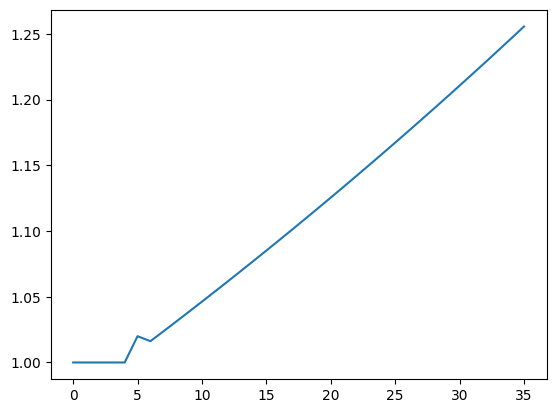

In [409]:
df_trans_prod = transformations_afolu.lvst_increase_productivity()
df_base = df_cs_integrated_0[df_cs_integrated_0["strategy_id"] == 0].reset_index(drop = True)
df_base["scalar_lvst_carrying_capacity"].plot()

In [405]:
df_trans["scalar_lvst_carrying_capacity"]

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     1.020000
6     1.016190
7     1.023629
8     1.031122
9     1.038670
10    1.045492
11    1.072084
12    1.095983
13    1.120454
14    1.145511
15    1.171167
16    1.197439
17    1.224343
18    1.251899
19    1.280126
20    1.309047
21    1.338685
22    1.369068
23    1.400224
24    1.432184
25    1.464982
26    1.498657
27    1.533247
28    1.568797
29    1.605356
30    1.642975
31    1.681711
32    1.721627
33    1.762790
34    1.805274
35    1.810089
Name: scalar_lvst_carrying_capacity, dtype: float64

In [392]:
attr_lndu = sa.model_attributes.get_attribute_table(sa.model_attributes.subsec_name_lndu)
pd.DataFrame(tba.arr_land_use_prevalence_out_no_intervention, columns = attr_lndu.key_values).tail()

vec_carrying_capcity = np.array(df_cs_integrated_0[df_cs_integrated_0["strategy_id"] == 0]["scalar_lvst_carrying_capacity"])


def transformation_support_lndu_get_adjusted_fractions_from_transition_w_natural_grassland(
    arr_land_use_prevalence_out_no_intervention: np.ndarray,
    arr_land_use_prevalence_out_with_intervention: np.ndarray,
    vec_lndu_pasture_frac_no_intervention: np.ndarray,
    vec_lvst_scalar_carrying_capacity_no_intervention: np.ndarray,
    model_afolu: mafl.AFOLU,
    min_frac_grassland_pasture: float = 0.05,
) -> Union[np.ndarray, None]:
    """
    Function Arguments
    ------------------
    - arr_land_use_prevalence_out_no_intervention: array giving land use prevalence
        (wide by class, long by time period) WITHOUT the transformation of land use
        classes
    - arr_land_use_prevalence_out_with_intervention: array giving land use prevalence
        (wide by class, long by time period) WITH the transformation of land use
        classes
    - vec_lndu_pasture_frac_no_intervention: vector of pasture fractions of grassland
        without intervention (dim = (n_tp, ))
    - vec_lvst_scalar_carrying_capacity_no_intervention: vector of carrying capacity 
        scalars w/o intervention (dim = (n_tp, ))
    - model_afolu: AFOLU model class to pass
    
    Keyword Arguments
    -----------------
    - min_frac_grassland_pasture: minimum fraction of grassland that must be preserved
        as pasture
    """
    
    # get some baseline values
    vec_lndu_prevalence_grass_base = arr_land_use_prevalence_out_no_intervention[:, model_afolu.ind_lndu_grass]
    vec_lndu_prevalence_pasture_base = vec_lndu_prevalence_grass_base*vec_lndu_pasture_frac_no_intervention
    vec_lndu_prevalence_natural_grassland_base = vec_lndu_prevalence_grass_base - vec_lndu_prevalence_pasture_base
    
    # calculate carrying target for new pasture
    vec_lndu_carrying_target_base = vec_lndu_prevalence_pasture_base*vec_lvst_scalar_carrying_capacity_no_intervention
    
    # now, get the area associated with pasture now and generate the scalar
    vec_lndu_prevalence_grass_intervention = arr_land_use_prevalence_out_with_intervention[:, model_afolu.ind_lndu_grass]
    vec_lndu_prevalence_pasture_intervention = sf.vec_bounds(vec_lndu_prevalence_grass_intervention - vec_lndu_prevalence_natural_grassland_base, (min_frac_grassland_pasture, 1.0))
    vec_lndu_carrying_capacity_new = vec_lndu_carrying_target_base/vec_lndu_prevalence_pasture_intervention
    
    # get new pasture fraction
    vec_lndu_pasture_frac_new = np.nan_to_num(
        vec_lndu_prevalence_pasture_intervention/vec_lndu_prevalence_grass_intervention,
        nan = 0.0, 
        posinf = 0.0,
    )
    
    return vec_lndu_pasture_frac_new, vec_lndu_carrying_capacity_new


transformation_support_lndu_get_adjusted_fractions_from_transition_w_natural_grassland(
    tba.arr_land_use_prevalence_out_no_intervention,
    tba.arr_land_use_prevalence_out_with_intervention,
    tba.vec_lndu_pasture_frac,
    vec_carrying_capcity,
    model_afolu,
    
)

(array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
        0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
        0.40017921, 0.39590865, 0.39238544, 0.38886511, 0.38534829,
        0.38183541, 0.37832687, 0.37482274, 0.37132287, 0.36782722,
        0.36433527, 0.36084644, 0.35735991, 0.35387486, 0.35039014,
        0.34690446, 0.34341633, 0.33992428, 0.33642651, 0.33292105,
        0.329406  , 0.32587914, 0.3223381 , 0.31878041, 0.31520351,
        0.3162037 ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.02      , 1.01619048, 1.02362899, 1.03112195, 1.03866977,
        1.04549192, 1.07208389, 1.09598319, 1.12045435, 1.14551075,
        1.17116721, 1.19743884, 1.22434308, 1.25189902, 1.28012604,
        1.30904676, 1.33868532, 1.36906846, 1.40022412, 1.43218401,
        1.46498226, 1.49865661, 1.53324663, 1.56879692, 1.60535598,
        1.64297514, 1.68171148, 1.72162736, 1.7627905 , 1.80527403,
        1.81008888]))

In [391]:
?np.nan_to_num

Signature: np.nan_to_num(x, copy=True, nan=0.0, posinf=None, neginf=None)
Docstring:
Replace NaN with zero and infinity with large finite numbers (default
behaviour) or with the numbers defined by the user using the `nan`,
`posinf` and/or `neginf` keywords.

If `x` is inexact, NaN is replaced by zero or by the user defined value in
`nan` keyword, infinity is replaced by the largest finite floating point
values representable by ``x.dtype`` or by the user defined value in
`posinf` keyword and -infinity is replaced by the most negative finite
floating point values representable by ``x.dtype`` or by the user defined
value in `neginf` keyword.

For complex dtypes, the above is applied to each of the real and
imaginary components of `x` separately.

If `x` is not inexact, then no replacements are made.

Parameters
----------
x : scalar or array_like
    Input data.
copy : bool, optional
    Whether to create a copy of `x` (True) or to replace values
    in-place (False). The in-place operati

In [385]:
df_cs_integrated_0[df_cs_integrated_0["strategy_id"] == 5008]["scalar_lvst_carrying_capacity"]
#df_trans["scalar_lvst_carrying_capacity"]
#pd.DataFrame(tba.arr_land_use_prevalence_out_with_intervention, columns = attr_lndu.key_values)

4500    1.000000
4501    1.000000
4502    1.000000
4503    1.000000
4504    1.000000
4505    1.020000
4506    1.016190
4507    1.023629
4508    1.031122
4509    1.038670
4510    1.046273
4511    1.127695
4512    1.205569
4513    1.279955
4514    1.350918
4515    1.418519
4516    1.482826
4517    1.543901
4518    1.601814
4519    1.656630
4520    1.708420
4521    1.757252
4522    1.803198
4523    1.846329
4524    1.886719
4525    1.924442
4526    1.959573
4527    1.992189
4528    2.022366
4529    2.050184
4530    2.075723
4531    2.099063
4532    2.120288
4533    2.139480
4534    2.156724
4535    2.172107
Name: scalar_lvst_carrying_capacity, dtype: float64

In [248]:

#fig, ax = plt.subplots(figsize = (12, 8))
df = sa.model_attributes.extract_model_variable(
    df_out,
    model_afolu.modvar_lndu_area_by_cat
)#.plot.area(ax = ax)#arr_lvst_pop_adj

arr = np.array(df)

pd.DataFrame(arr[1:] - arr[0:-1], columns = df.columns)


,area_lndu_croplands,area_lndu_forests_mangroves,area_lndu_forests_primary,area_lndu_forests_secondary,area_lndu_grasslands,area_lndu_other,area_lndu_settlements,area_lndu_wetlands
0,2.796658e+05,72946.433527,-1.729958e+06,1.588941e+05,3.918393e+05,768656.737532,71387.830983,-13431.726087
1,2.983635e+05,72515.217646,-1.853972e+06,1.733596e+05,4.656412e+05,761063.041566,99264.922964,-16235.773285
2,3.172618e+05,72061.944313,-1.976481e+06,1.875716e+05,5.385559e+05,753239.756904,126825.122966,-19035.410791
3,3.363561e+05,71579.374305,-2.097351e+06,2.015080e+05,6.104908e+05,745205.861538,154040.265874,-21828.930448
4,3.556734e+05,71036.050925,-2.216505e+06,2.151444e+05,6.814336e+05,736948.227000,180883.966281,-24614.584199
5,3.752059e+05,70454.271261,-2.333847e+06,2.284588e+05,7.513028e+05,728486.764295,207329.221470,-27390.640997
6,3.949808e+05,69787.525524,-2.449241e+06,2.414296e+05,8.200418e+05,719806.932966,233349.658128,-30155.368336
7,4.149897e+05,69148.608322,-2.562688e+06,2.540348e+05,8.875715e+05,710929.314426,258920.936120,-32907.038048
8,4.352576e+05,68442.606269,-2.674056e+06,2.662543e+05,9.538867e+05,701840.878718,284017.940905,-35643.966633
9,4.557750e+05,67692.200648,-2.783260e+06,2.780675e+05,1.018911e+06,692562.144787,308616.469017,-38364.438116


In [44]:
df_cs_integrated_0["lndu_reallocation_factor"]

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
4531    0.44
4532    0.46
4533    0.48
4534    0.50
4535    0.50
Name: lndu_reallocation_factor, Length: 4536, dtype: float64

0     3.159190e+07
1     3.193999e+07
2     3.228190e+07
3     3.261775e+07
4     3.294789e+07
5     3.327253e+07
6     3.300788e+07
7     3.332328e+07
8     3.363826e+07
9     3.395283e+07
10    3.426701e+07
11    3.464130e+07
12    3.501211e+07
13    3.537957e+07
14    3.574384e+07
15    3.610503e+07
16    3.643972e+07
17    3.677081e+07
18    3.709844e+07
19    3.742275e+07
20    3.774387e+07
21    3.803483e+07
22    3.832217e+07
23    3.860603e+07
24    3.888653e+07
25    3.916380e+07
26    3.941099e+07
27    3.965439e+07
28    3.989414e+07
29    4.013037e+07
30    4.036321e+07
31    4.056576e+07
32    4.076431e+07
33    4.095900e+07
34    4.114998e+07
35    4.133737e+07
dtype: float64

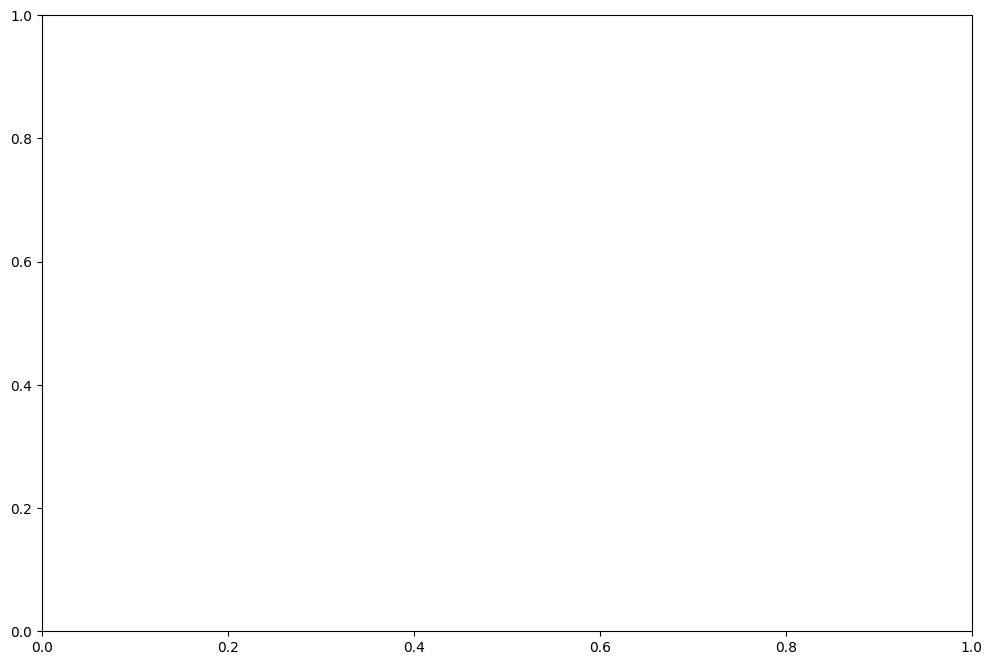

In [42]:

fig, ax = plt.subplots(figsize = (12, 8))
sa.model_attributes.extract_model_variable(
    df_out,
    model_afolu.modvar_lvst_demand_livestock,
)[["demand_lvst_cattle_dairy", "demand_lvst_cattle_nondairy"]].sum(axis = 1)#plot.area(ax = ax)#arr_lvst_pop_adj

<AxesSubplot: >

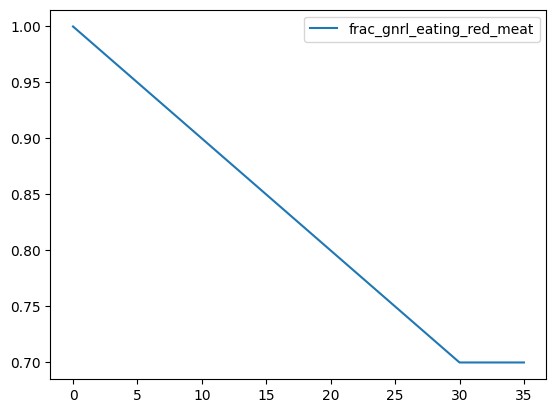

In [12]:
sa.model_attributes.extract_model_variable(
    df_cs_integrated_0,
    model_afolu.model_socioeconomic.modvar_gnrl_frac_eating_red_meat,
).iloc[0:36].plot()#arr_lvst_pop_adj

In [139]:
vec = np.apply_along_axis(sf.mean_median_ratio, 0, arr_verify)
w = np.where(vec != 0)[0]




#out, out_compare, arr_verify, fields_check = tmp
#np.where(np.abs(out - out_compare) > 10)
fields_check[w[514]]
df_out["elasticity_ippu_lime_and_carbonite_production_to_gdp"]

0    -1.958848e+02
1     3.133340e+02
2    -7.974825e+02
3     3.208704e+02
4    -3.042863e+09
5     2.000000e+00
6     1.966667e+00
7     1.933333e+00
8     1.900000e+00
9     1.866667e+00
10    1.833333e+00
11    1.800000e+00
12    1.766667e+00
13    1.733333e+00
14    1.700000e+00
15    1.666667e+00
16    1.633333e+00
17    1.600000e+00
18    1.566667e+00
19    1.533333e+00
20    1.500000e+00
21    1.466667e+00
22    1.433333e+00
23    1.400000e+00
24    1.366667e+00
25    1.333333e+00
26    1.300000e+00
27    1.266667e+00
28    1.233333e+00
29    1.200000e+00
30    1.166667e+00
31    1.133333e+00
32    1.100000e+00
33    1.066667e+00
34    1.033333e+00
35    1.000000e+00
Name: elasticity_ippu_lime_and_carbonite_production_to_gdp, dtype: float64

In [112]:
out2 = np.apply_along_axis(sf.mean_median_ratio, 0, arr_verify)
inds = np.where(out2 != 0.0)[0]
out2 = out2[inds]
out2[513]
#out[513]
fields_check[inds[513]]

#sf.mean_median_ratio(df_out["elasticity_ippu_glass_production_to_gdp"])
out_compare[513]

0.0001

In [59]:
df_out.columns[516]

df_out["ef_trns_mobile_combustion_road_heavy_regional_kg_ch4_per_tj_natural_gas"]

0     350.0
1     350.0
2     350.0
3     350.0
4     350.0
5     350.0
6     350.0
7     350.0
8     350.0
9     350.0
10    350.0
11    350.0
12    350.0
13    350.0
14    350.0
15    350.0
16    350.0
17    350.0
18    350.0
19    350.0
20    350.0
21    350.0
22    350.0
23    350.0
24    350.0
25    350.0
26    350.0
27    350.0
28    350.0
29    350.0
30    350.0
31    350.0
32    350.0
33    350.0
34    350.0
35    350.0
Name: ef_trns_mobile_combustion_road_heavy_regional_kg_ch4_per_tj_natural_gas, dtype: float64

In [13]:
sa.model_attributes.extract_model_variable(
    df_fake_data_0,
    model_afolu.modvar_agrc_frac_no_till
)



,frac_agrc_no_till_cereals,frac_agrc_no_till_fibers,frac_agrc_no_till_other_annual,frac_agrc_no_till_pulses,frac_agrc_no_till_tubers,frac_agrc_no_till_vegetables_and_vines
0,0.125,0.125,0.125,0.125,0.0,0.0
1,0.125,0.125,0.125,0.125,0.0,0.0
2,0.125,0.125,0.125,0.125,0.0,0.0
3,0.125,0.125,0.125,0.125,0.0,0.0
4,0.125,0.125,0.125,0.125,0.0,0.0
5,0.125,0.125,0.125,0.125,0.0,0.0
6,0.125,0.125,0.125,0.125,0.0,0.0
7,0.125,0.125,0.125,0.125,0.0,0.0
8,0.125,0.125,0.125,0.125,0.0,0.0
9,0.125,0.125,0.125,0.125,0.0,0.0


In [15]:
sa.model_attributes.extract_model_variable(
    df_out,
    model_afolu.modvar_lndu_area_by_cat
).head()

,area_lndu_croplands,area_lndu_forests_mangroves,area_lndu_forests_primary,area_lndu_forests_secondary,area_lndu_grasslands,area_lndu_other,area_lndu_settlements,area_lndu_wetlands
0,8.234535e+07,663341.541947,4.602542e+08,9.260024e+06,2.355882e+08,4.710472e+07,2.069183e+06,1.429198e+07
1,8.257848e+07,736161.831710,4.592895e+08,9.418656e+06,2.353608e+08,4.777432e+07,2.140555e+06,1.427854e+07
2,8.282989e+07,808435.656697,4.581983e+08,9.591612e+06,2.352100e+08,4.843646e+07,2.239950e+06,1.426240e+07
3,8.309976e+07,880150.178708,4.569819e+08,9.778726e+06,2.351348e+08,4.909092e+07,2.367145e+06,1.424356e+07
4,8.338824e+07,951284.949656,4.556417e+08,9.979793e+06,2.351345e+08,4.973751e+07,2.521885e+06,1.422202e+07


In [41]:
sa.model_attributes.extract_model_variable(
    df_out,
    model_afolu.modvar_lndu_area_improved
).head()

df_out[[x for x in df_out.columns if "emission_co2e_subsector_total" in x]].sum(axis = 1).tail()

31    2360.607867
32    2411.178224
33    2462.564057
34    2514.800765
35    2560.034968
dtype: float64

In [115]:
import transformations_base_afolu as tba
import transformations_base_general as tbg
import define_transformations_afolu as dta

importlib.reload(tba)
importlib.reload(tbg)
importlib.reload(dta)

year_0_ramp = 2025

# set some parameters (WILL SET TO READ FROM A CONFIG OR STRATEGY DEFINITION FILE)
dict_config_te = {
    "categories_entc_max_investment_ramp": [
        "pp_hydropower",
        "pp_nuclear"
    ],
    "categories_entc_renewable": [
        "pp_geothermal",
        "pp_hydropower",
        "pp_ocean",
        "pp_solar",
        "pp_wind"
    ],
    "categories_inen_high_heat": [
        "cement", 
        "chemicals", 
        "glass", 
        "lime_and_carbonite", 
        "metals"
    ],
    "dict_entc_renewable_target_msp": {
        "pp_solar": 0.15,
        "pp_geothermal": 0.1,
        "pp_wind": 0.15
    },
    "frac_inen_high_temp_elec_hydg": 0.5*0.45,
    "frac_inen_low_temp_elec": 0.95*0.45,
    "n_tp_ramp": None,
    "vir_renewable_cap_delta_frac": 0.01,
    "vir_renewable_cap_max_frac": 0.05,
    "year_0_ramp": year_0_ramp
}


df0 = df_cs_integrated_0[
    df_cs_integrated_0["strategy_id"].isin([0])
]

transformations_afolu = dta.TransformationsAFOLU(
    sa.model_attributes,
    dict_config_te,
    df_input = df0,
    field_region = "nation",
    logger = logger
)


df_trans = transformations_afolu.lndu_expand_silvopasture()



df_trans[["frac_lndu_proportion_grasslands_pasture"]];


{'forests_secondary': {'categories_inflow_restrict': ['grasslands'], 'categories_scalar_reference': ['pasture_tba'], 'magnitude': 12.813461185165306, 'magnitude_type': 'baseline_scalar', 'tp_baseline': 35}}
{'forests_secondary': {'categories_inflow_restrict': ['grasslands'], 'categories_scalar_reference': ['pasture_tba'], 'magnitude': array(0.06091893), 'magnitude_type': 'baseline_scalar', 'tp_baseline': 35}}
scalar:	1.0447676463654616
scalar_lndu_cur:	[  1.           1.           1.           1.         407.64310657
   1.           1.           1.        ]
scalar:	1.0034317365389631
scalar_lndu_cur:	[1.00343174 1.00343174 1.00343174 1.00343174 1.00343174 1.00343174
 1.00343174 1.00343174]


In [122]:

df_out, df_elec = run_strat(1011, df_trans, df_fake_data_0);

In [111]:
scalar = 1.0034317365389631

importlib.reload(mafl)
model_afolu = mafl.AFOLU(sa.model_attributes);

model_afolu.get_matrix_column_scalar(
    tba.Q[:, 3],
    scalar,
    tba.x_out,
    mask_max_out_states = tba.max_outs,
    max_iter = 100
)


array([1.00343174, 1.00343174, 1.00343174, 1.00343174, 1.00343174,
       1.00343174, 1.00343174, 1.00343174])

In [119]:
df_out, df_elec = run_strat(0, df_cs_integrated_0, df_fake_data_0);
cols_check = []
for k in df_out.columns:
    vec = np.array(df_out[k])
    
    mv = vec[vec != -999]
    mv = min(mv) if (len(mv) > 0) else 0
    cols_check.append(k) if (mv < 0) else None

cols_check

['elasticity_gnrl_rate_occupancy_to_gdppc',
 'elasticity_ippu_cement_production_to_gdp',
 'elasticity_ippu_chemicals_production_to_gdp',
 'elasticity_ippu_electronics_production_to_gdp',
 'elasticity_ippu_glass_production_to_gdp',
 'elasticity_ippu_lime_and_carbonite_production_to_gdp',
 'elasticity_ippu_metals_production_to_gdp',
 'elasticity_ippu_mining_production_to_gdp',
 'elasticity_ippu_paper_production_to_gdp',
 'elasticity_ippu_plastic_production_to_gdp',
 'elasticity_ippu_rubber_and_leather_production_to_gdp',
 'elasticity_ippu_textiles_production_to_gdp',
 'elasticity_scoe_enerdem_per_hh_residential_elec_appliances_to_gdppc',
 'elasticity_scoe_enerdem_per_hh_residential_heat_energy_to_gdppc',
 'elasticity_scoe_enerdem_per_mmmgdp_commercial_municipal_elec_appliances_to_gdppc',
 'elasticity_scoe_enerdem_per_mmmgdp_commercial_municipal_heat_energy_to_gdppc',
 'emission_co2e_co2_ccsq_direct_air_capture',
 'emission_co2e_co2_frst_harvested_wood_products',
 'emission_co2e_co2_frst_

<AxesSubplot: >

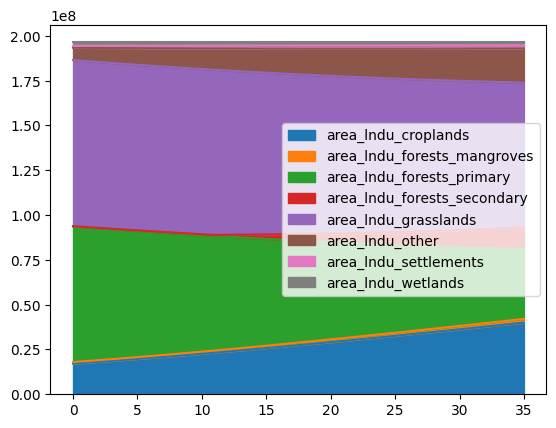

In [123]:
df_out[[x for x in df_out.columns if ("lndu" in x) and ("area" in x) and ("conversion" not in x)]].plot.area()

In [59]:
model_elec.julia_main.vec_test = vec
string = f"""
    vec_test = Int64.(collect(vec_test))
"""

model_elec.julia_main.eval(string);

vec

In [46]:
jl.convert(jl.Vector[jl.Int64], model_elec.julia_main.vec_test)

TypeError: 'PyCall.jlwrap' object is not subscriptable

In [150]:
t0 = time.time()
df_elec_trajectories, df_elec = run_strat(3020, df_cs_integrated_0, df_fake_data_0);
t1 = time.time()
df_ins = (
    sf.merge_output_df_list(
        [ 
            df_elec_trajectories,
            df_elec
        ], 
        sa.model_attributes, 
        "concatenate"
    )
    .drop(["future_id"], axis = 1)
)


2023-05-23 20:00:55,931 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 20:00:55.959 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 20:00:56.024 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 20:00:58.325 Started modeling scenario.
2023-23-May 20:02:33.521 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 20:02:34,024 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>


In [157]:
fields_iter = [x for x in df_ins.columns if x not in ["region", "nation", "iso_code3"]]
fields_check = []
for k in fields_iter:
    
    v3020 = df_ins[k].iloc[0]
    v3019 = df_ins[k].iloc[0]
    if np.abs((v3019 - v3020)/v3020) > 0.005:
        fields_check.append(k)
fields_check

[]

In [154]:
#df_ins_3019 = df_ins.copy()
df_ins_3019["exportsadj_enfu_fuel_coal"]

0     331.593339
1     312.962263
2     573.364052
3     362.275119
4     343.702101
5     306.990852
6     310.375598
7     313.792530
8     317.249153
9     320.745587
10    324.281977
11    324.087965
12    323.953037
13    323.874989
14    323.851790
15    323.881565
16    323.719979
17    323.615416
18    323.565890
19    323.569557
20    323.624700
21    323.895368
22    324.210154
23    324.567938
24    324.967669
25    325.408366
26    325.931032
27    326.491965
28    327.090414
29    327.725676
30    328.397091
31    329.027373
32    329.694020
33    330.396404
34    331.133940
35    331.906078
Name: exportsadj_enfu_fuel_coal, dtype: float64

In [107]:
# try running it out
i = 0
max_iter = 100
obj = 0
thresh = 10**6

while (obj < thresh) & (i < max_iter):
    df_elec_trajectories, df_elec = run_strat(3019, df_cs_integrated_0, df_fake_data_0);
    df_ins = (
        sf.merge_output_df_list(
            [ 
                df_elec_trajectories,
                df_elec
            ], 
            sa.model_attributes, 
            "concatenate"
        )
        .drop(["future_id"], axis = 1)
    )
    #df_ins.shape
    #df_ins[[x for x in df_ins.columns if x.startswith("exportsadj_enfu")]]
    obj = df_ins[
        [
            x for x in df_ins.columns 
            if ("enfu" in x)
            and ("prod" in x)
        ]
    ].max().max()
    
    i += 1

2023-05-23 14:27:09,393 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:27:09.396 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:27:09.429 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:27:11.715 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:28:08,157 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:28:09,174 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:28:09.177 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:28:09.205 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:28:11.105 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:29:04,224 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:29:05,099 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:29:05.101 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:29:05.126 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:29:07.627 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:30:04,646 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:30:05,519 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:30:05.521 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:30:05.544 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:30:07.272 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:30:52,420 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:30:53,399 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:30:53.403 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:30:53.437 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:30:55.670 Started modeling scenario.

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181



Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 531267 rows and 525935 columns
Presolve time: 2.07s
Presolved: 89305 rows, 70511 columns, 481041 nonzeros

Ordering time: 2.12s

Barrier statistics:
 AA' NZ     : 1.842e+06
 Factor NZ  : 1.135e+07 (roughly 160 MB of memory)
 Factor Ops : 3.544e+09 (less than 1 second per iteration)
 Threads    : 4

                  Objective              

2023-05-23 14:31:43,550 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:31:44,384 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:31:44.386 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:31:44.413 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:31:46.247 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:32:31,805 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:32:32,636 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:32:32.638 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:32:32.665 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:32:34.387 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:33:23,336 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:33:24,388 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:33:24.390 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:33:24.421 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:33:26.620 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:34:18,046 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:34:18,995 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:34:18.997 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:34:19.027 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:34:20.999 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:35:09,465 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:35:10,532 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:35:10.534 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:35:10.562 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:35:12.699 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:36:04,961 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:36:05,933 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:36:05.935 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:36:05.962 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181


Set parameter TimeLimit to value 900
2023-23-May 14:36:07.934 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 531267 rows and 525935 columns
Presolve time: 2.13s
Presolved: 89305 rows, 70511 columns, 481041 nonzeros

Ordering time: 2.12s

Barrier statistics:
 AA' NZ     : 1.842e+06
 Factor NZ  : 1.135e+07 (roughly 160 MB of memory)
 Factor Ops : 3.544e+09 (less

2023-05-23 14:36:57,783 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:36:58,741 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:36:58.744 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:36:58.773 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181


2023-23-May 14:37:00.845 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 531267 rows and 525935 columns
Presolve time: 2.14s
Presolved: 89305 rows, 70511 columns, 481041 nonzeros

Ordering time: 2.03s

Barrier statistics:
 AA' NZ     : 1.842e+06
 Factor NZ  : 1.135e+07 (roughly 160 MB of memory)
 Factor Ops : 3.544e+09 (less than 1 second per iteration)
 Thread

2023-05-23 14:37:51,276 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:37:52,236 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:37:52.238 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:37:52.265 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:37:54.203 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:38:44,375 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:38:45,306 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:38:45.309 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:38:45.336 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181


Set parameter TimeLimit to value 900
2023-23-May 14:38:47.343 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 531267 rows and 525935 columns
Presolve time: 2.35s
Presolved: 89305 rows, 70511 columns, 481041 nonzeros

Ordering time: 1.99s

Barrier statistics:
 AA' NZ     : 1.842e+06
 Factor NZ  : 1.135e+07 (roughly 160 MB of memory)
 Factor Ops : 3.544e+09 (less

2023-05-23 14:39:41,299 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:39:42,396 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:39:42.400 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:39:42.431 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:39:44.758 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:40:47,784 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:40:48,683 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:40:48.685 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:40:48.709 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181


Set parameter TimeLimit to value 900
2023-23-May 14:40:50.588 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 531267 rows and 525935 columns
Presolve time: 2.33s
Presolved: 89305 rows, 70511 columns, 481041 nonzeros

Ordering time: 2.29s

Barrier statistics:
 AA' NZ     : 1.842e+06
 Factor NZ  : 1.135e+07 (roughly 160 MB of memory)
 Factor Ops : 3.544e+09 (less

2023-05-23 14:41:43,668 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:41:44,566 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:41:44.570 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:41:44.605 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:41:47.160 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:42:36,816 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:42:37,702 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:42:37.704 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:42:37.729 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:42:39.607 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:43:28,261 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:43:29,168 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:43:29.171 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:43:29.196 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:43:31.220 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:44:20,650 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:44:21,549 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:44:21.551 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:44:21.576 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-23-May 14:44:23.465 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, 

┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-23 14:45:15,285 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2023-05-23 14:45:16,233 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-23-May 14:45:16.235 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-23-May 14:45:16.265 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181


Set parameter TimeLimit to value 900
2023-23-May 14:45:18.434 Started modeling scenario.
Set parameter TimeLimit to value 900
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 620572 rows, 596446 columns and 1787445 nonzeros
Model fingerprint: 0x17a7dd0a
Coefficient statistics:
  Matrix range     [6e-09, 8e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-02, 1e+10]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Presolve removed 531267 rows and 525935 columns
Presolve time: 2.39s
Presolved: 89305 rows, 70511 columns, 481041 nonzeros

Ordering time: 2.08s

Barrier statistics:
 AA' NZ     : 1.842e+06
 Factor NZ  : 1.135e+07 (roughly 160 MB of memory)
 Factor Ops : 3.544e+09 (less

Traceback (most recent call last):
  File "/Users/jsyme/anaconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/8m/3ll2cn6d1hdcs6gjqxr2jx5d2hffc9/T/ipykernel_28891/1585406349.py", line 8, in <module>
    df_elec_trajectories, df_elec = run_strat(3019, df_cs_integrated_0, df_fake_data_0);
                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/8m/3ll2cn6d1hdcs6gjqxr2jx5d2hffc9/T/ipykernel_28891/1703503774.py", line 116, in run_strat
    df_elec = model_elec.project(df_cs_integrated, engine = engine, regions = "brazil")
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/python/model_electricity.py", line 9214, in project
KeyboardInterrupt

During handling of the above exception, another excep

In [133]:
#type(model_elec.julia_jump.Model(model_elec.solver_module.Optimizer))
def func(x) -> "Pycall.jlwrap":
    print(x)
    
?func

Signature: func(x) -> 'Pycall.jlwrap'
Docstring: <no docstring>
File:      /var/folders/8m/3ll2cn6d1hdcs6gjqxr2jx5d2hffc9/T/ipykernel_28891/278351060.py
Type:      function


In [86]:


df_out = model_energy.project(
    df_ins, 
    subsectors_project = sa.model_attributes.subsec_name_fgtv
)

df_ins[[x for x in df_ins.columns if "exportsadj_enfu_fuel" in x]].sum(axis = 1)
df_out[[x for x in df_out.columns if "emission_co2e" in x]].sum(axis = 1)

0     43.337345
1     38.030599
2     11.762203
3     38.907925
4     38.755361
5     35.208927
6     40.621545
7     28.259297
8     36.743971
9     37.101528
10    37.465940
11    38.631197
12    39.834238
13    41.072963
14    42.345485
15    43.650104
16    44.896660
17    46.172661
18    47.476916
19    48.808368
20    50.166078
21    51.582561
22    53.025804
23    54.495593
24    55.991821
25    57.514472
26    59.068069
27    60.649786
28    62.259851
29    63.898544
30    65.566194
31    67.232364
32    68.929771
33    70.658924
34    72.420367
35    74.214681
dtype: float64

In [34]:
df_msp[
    df_msp["y"].isin([1035])
    & df_msp["f"].isin(["fuel_electricity"])
]#["val"].sum()


,id,r,t,f,y,val
35,36,costa_rica,pp_coal,fuel_electricity,1035,0.071816
71,72,costa_rica,pp_gas,fuel_electricity,1035,0.207696
107,108,costa_rica,pp_hydropower,fuel_electricity,1035,0.000000
143,144,costa_rica,pp_nuclear,fuel_electricity,1035,0.051998
179,180,costa_rica,pp_oil,fuel_electricity,1035,0.049643
215,216,costa_rica,pp_solar,fuel_electricity,1035,0.029150
359,360,costa_rica,supply_fuel_electricity,fuel_electricity,1035,0.077482


In [5]:
df_elec_trajectories, df_elec = run_strat(3003, df_cs_integrated_0, df_fake_data_0)



2023-05-22 10:29:02,708 - INFO - 	Path to temporary NemoMod database '/Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite' not found. Creating...


2023-22-May 10:29:03.538 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
2023-22-May 10:29:03.924 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/lac_decarbonization/tmp/nemomod_intermediate_database.sqlite.
Set parameter TimeLimit to value 900
2023-22-May 10:29:37.840 Started modeling scenario.
2023-22-May 10:30:53.211 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2023-05-22 10:30:53,868 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>


In [11]:
engine = sqlalchemy.create_engine(f"sqlite:///{sa.fp_sqlite_nemomod_db_tmp}")
engine.table_names()

['AccumulatedAnnualDemand',
 'AnnualEmissionLimit',
 'AnnualExogenousEmission',
 'AvailabilityFactor',
 'CapacityFactor',
 'CapacityOfOneTechnologyUnit',
 'CapacityToActivityUnit',
 'CapitalCost',
 'CapitalCostStorage',
 'DefaultParams',
 'DepreciationMethod',
 'DiscountRate',
 'EMISSION',
 'EmissionActivityRatio',
 'EmissionsPenalty',
 'FUEL',
 'FixedCost',
 'InputActivityRatio',
 'InterestRateStorage',
 'InterestRateTechnology',
 'LTsGroup',
 'MODE_OF_OPERATION',
 'MinShareProduction',
 'MinStorageCharge',
 'MinimumUtilization',
 'ModelPeriodEmissionLimit',
 'ModelPeriodExogenousEmission',
 'NODE',
 'NodalDistributionDemand',
 'NodalDistributionStorageCapacity',
 'NodalDistributionTechnologyCapacity',
 'OperationalLife',
 'OperationalLifeStorage',
 'OutputActivityRatio',
 'REGION',
 'REMinProductionTarget',
 'RETagTechnology',
 'RampRate',
 'RampingReset',
 'ReserveMargin',
 'ReserveMarginTagFuel',
 'ReserveMarginTagTechnology',
 'ResidualCapacity',
 'ResidualStorageCapacity',
 'STOR

In [18]:
x = 825.1330206659469

df = sq.sql_table_to_df(engine, "vdemandannualnn")
df[
    df["y"].isin(["1035"])
    & df["f"].isin(["fuel_electricity"])
]#["val"].sum()


#
6142.394923 + x


6967.527943665947

In [ ]:
df = sq.sql_table_to_df(engine, "vusebytechnologyannual")
df[
    df["y"].isin(["1035"])
    & df["f"].isin(["fuel_electricity"])
]#["val"].sum()

In [17]:
df = sq.sql_table_to_df(engine, "vproductionbytechnologyannual")
df[
    df["y"].isin(["1035"])
    & df["f"].isin(["fuel_electricity"])
]["val"].sum()

6967.527943677061

In [37]:
df_elec_trajectories, df_elec = run_strat(0, df_cs_integrated_0, df_fake_data_0)

#df_elec_trajectories[[x for x in df_elec_trajectories.columns if ("hydrocarbon_gas" in x) and ("energy_demand") in x]]
#df_elec_trajectories["qty_gnrl_households"]

In [39]:
df_elec_trajectories, df_elec = run_strat(0, df_cs_integrated_0, df_fake_data_0)
df_elec_trajectories

,strategy_id,future_id,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yield_agrc_fruits_tonne,yield_agrc_herbs_and_other_perennial_crops_tonne,yield_agrc_nuts_tonne,yield_agrc_other_annual_tonne,yield_agrc_other_woody_perennial_tonne,yield_agrc_pulses_tonne,yield_agrc_rice_tonne,yield_agrc_sugar_cane_tonne,yield_agrc_tubers_tonne,yield_agrc_vegetables_and_vines_tonne
0,0,0,0,2.974197e+06,2.044387e+07,1.113471e+06,2.659536e+06,212055.577843,799994.326474,3.503781e+07,...,5.219421e+07,196851.192912,2.171329e+06,5.782080e+07,1.730770e+06,3.259899e+06,1.319115e+07,8.045758e+08,3.115091e+07,1.501269e+07
1,0,0,1,2.982617e+06,2.050175e+07,1.116623e+06,2.667066e+06,212655.920008,802259.158792,3.513701e+07,...,4.920900e+07,193261.700104,1.543354e+06,5.486714e+07,1.813966e+06,4.834445e+06,1.256575e+07,8.174413e+08,3.154765e+07,1.552795e+07
2,0,0,2,2.991698e+06,2.056417e+07,1.120023e+06,2.675186e+06,213303.366484,804701.695379,3.524398e+07,...,5.302251e+07,200142.548772,1.637262e+06,6.006491e+07,2.139423e+06,4.142347e+06,1.433119e+07,8.120728e+08,3.223501e+07,1.584247e+07
3,0,0,3,3.001445e+06,2.063117e+07,1.123672e+06,2.683902e+06,213998.320759,807323.458422,3.535881e+07,...,5.300136e+07,186007.340404,1.822016e+06,6.163253e+07,2.055058e+06,4.897437e+06,1.459610e+07,8.160317e+08,3.230706e+07,1.638111e+07
4,0,0,4,3.011864e+06,2.070279e+07,1.127573e+06,2.693219e+06,214741.219084,810126.093710,3.548156e+07,...,5.300873e+07,188027.411430,1.609899e+06,5.707280e+07,2.184369e+06,5.521576e+06,1.407994e+07,8.197551e+08,3.272512e+07,1.675188e+07
5,0,0,5,3.022963e+06,2.077907e+07,1.131728e+06,2.703143e+06,215532.526331,813111.354999,3.561231e+07,...,5.426814e+07,192494.685657,1.648148e+06,5.842877e+07,2.236267e+06,5.652761e+06,1.441446e+07,8.392313e+08,3.350262e+07,1.714989e+07
6,0,0,6,3.034747e+06,2.086008e+07,1.136140e+06,2.713681e+06,216372.732236,816281.089858,3.575113e+07,...,5.556929e+07,197109.985305,1.687664e+06,5.982967e+07,2.289884e+06,5.788293e+06,1.476006e+07,8.593529e+08,3.430589e+07,1.756108e+07
7,0,0,7,3.047225e+06,2.094584e+07,1.140811e+06,2.724838e+06,217262.354713,819637.252152,3.589812e+07,...,5.691372e+07,201878.816635,1.728495e+06,6.127717e+07,2.345285e+06,5.928333e+06,1.511716e+07,8.801439e+08,3.513588e+07,1.798594e+07
8,0,0,8,3.060403e+06,2.103643e+07,1.145744e+06,2.736622e+06,218201.936770,823181.890412,3.605337e+07,...,5.830305e+07,206806.907794,1.770690e+06,6.277302e+07,2.402536e+06,6.073051e+06,1.548619e+07,9.016292e+08,3.599358e+07,1.842500e+07
9,0,0,9,3.074290e+06,2.113188e+07,1.150943e+06,2.749040e+06,219192.044043,826917.138545,3.621697e+07,...,5.973895e+07,211900.215474,1.814299e+06,6.431901e+07,2.461706e+06,6.222620e+06,1.586759e+07,9.238348e+08,3.688004e+07,1.887878e+07


In [79]:
tuple_enfu_production_and_demands = model_energy.project_enfu_production_and_demands(
    df_elec_trajectories, 
    target_energy_units = sa.model_attributes.configuration.get("energy_units_nemomod")
) 

In [91]:
attr_fuel = sa.model_attributes.dict_attributes.get("cat_fuel")
pd.DataFrame(tuple_enfu_production_and_demands[4], columns = attr_fuel.key_values).iloc[30]
tuple_enfu_production_and_demands[0].min()

0.0